# **DATA PREPARATION**

SOURCE: https://archive.ics.uci.edu/dataset/20/census+income OR
https://www.kaggle.com/datasets/uciml/adult-census-income/dat

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading The dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]

# Read the dataset with the correct column names
df = pd.read_csv("/content/drive/MyDrive/MLProject/census_income/adult.data", names=column_names, sep=",", skipinitialspace=True)

# Display the first few rows
df.head(5)

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [ ]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [ ]:
df['capital_gain'].value_counts()

capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
6097         1
1639         1
7978         1
2387         1
5060         1
Name: count, Length: 119, dtype: int64

In [ ]:
df['capital_loss'].value_counts()

capital_loss
0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2467        1
2163        1
2472        1
1411        1
Name: count, Length: 92, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Just looking at other datas. this is the meta data
with open("/content/drive/MyDrive/MLProject/census_income/adult.names", "r") as file:
    names_content = file.read()

print(names_content)  # This will display the content of the file


| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

# **DATA EXPLORATION**


*   Do Visualizations
*   Look for any anomalies, skew,  outliers, etc.

# Explore the target Variable

## Explore Final Weight

In [ ]:
df["fnlwgt"].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

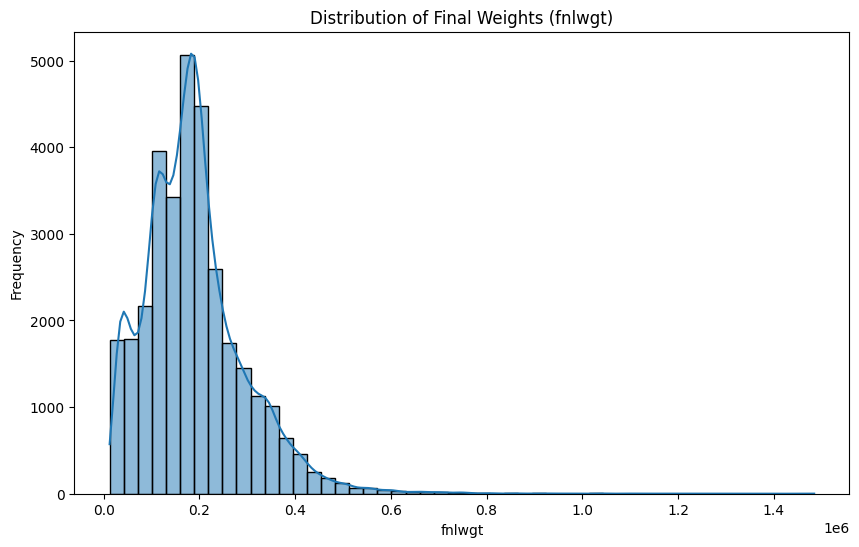

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df["fnlwgt"], bins=50, kde=True)
plt.title("Distribution of Final Weights (fnlwgt)")
plt.xlabel("fnlwgt")
plt.ylabel("Frequency")
plt.show()


In [ ]:
df.groupby("race")["fnlwgt"].mean().sort_values(ascending=False)


race
Black                 228013.124200
Other                 197124.191882
White                 187298.064280
Asian-Pac-Islander    159940.609240
Amer-Indian-Eskimo    120831.147910
Name: fnlwgt, dtype: float64

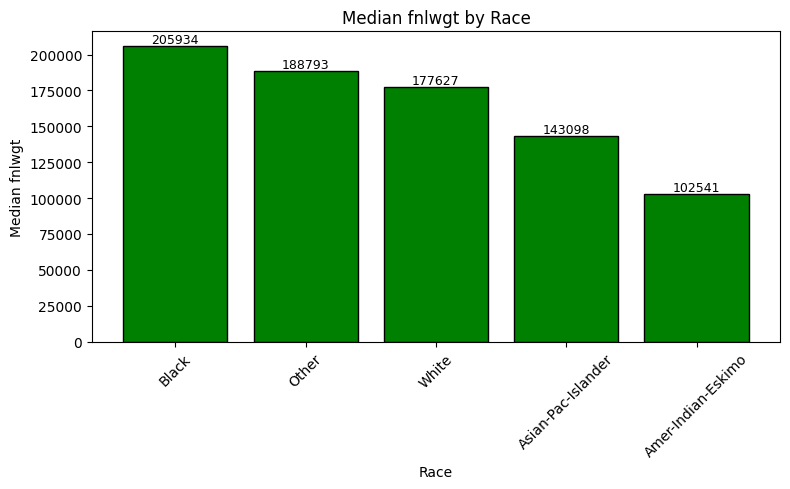

In [ ]:
import matplotlib.pyplot as plt

# Calculate the median fnlwgt by race
median_fnlwgt_by_race = df.groupby("race")["fnlwgt"].median().sort_values(ascending=False)

# Plot as bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(median_fnlwgt_by_race.index, median_fnlwgt_by_race.values, color='green', edgecolor='black')
plt.title("Median fnlwgt by Race")
plt.ylabel("Median fnlwgt")
plt.xlabel("Race")
plt.xticks(rotation=45)

# Add number labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


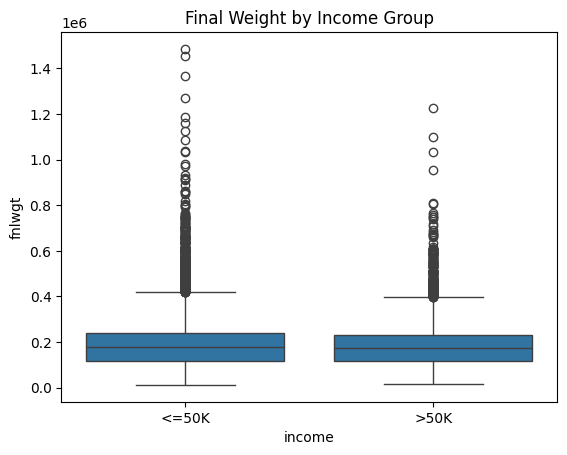

In [ ]:
sns.boxplot(data=df, x="income", y="fnlwgt")
plt.title("Final Weight by Income Group")
plt.show()


In [ ]:
import pandas as pd

# Replace 'target' with your actual target variable name
target_col = 'income'
columns_to_check = ['marital_status', 'relationship', 'race', 'sex']

# Store results in a dictionary
result_tables = {}

for col in columns_to_check:
    # Calculate % distribution of target within each feature class
    dist = df.groupby(col)[target_col].value_counts(normalize=True).unstack().fillna(0) * 100
    result_tables[col] = dist.round(2)

# Display one table at a time
for col, table in result_tables.items():
    print(f"\nDistribution of target variable by '{col}':\n")
    print(table)



Distribution of target variable by 'marital_status':

income                 <=50K   >50K
marital_status                     
Divorced               89.58  10.42
Married-AF-spouse      56.52  43.48
Married-civ-spouse     55.32  44.68
Married-spouse-absent  91.87   8.13
Never-married          95.40   4.60
Separated              93.56   6.44
Widowed                91.44   8.56

Distribution of target variable by 'relationship':

income          <=50K   >50K
relationship                
Husband         55.14  44.86
Not-in-family   89.69  10.31
Other-relative  96.23   3.77
Own-child       98.68   1.32
Unmarried       93.67   6.33
Wife            52.49  47.51

Distribution of target variable by 'race':

income              <=50K   >50K
race                            
Amer-Indian-Eskimo  88.42  11.58
Asian-Pac-Islander  73.44  26.56
Black               87.61  12.39
Other               90.77   9.23
White               74.41  25.59

Distribution of target variable by 'sex':

income  <=50K   

In [ ]:
import pandas as pd

# Replace 'target' with your actual target variable name
target_col = 'income'
columns_to_check = ['race', 'sex']

# Store results in a dictionary
result_tables = {}

for col in columns_to_check:
    # Calculate % distribution of target within each feature class
    dist = df.groupby(col)[target_col].value_counts(normalize=True).unstack().fillna(0) * 100
    result_tables[col] = dist.round(2)

# Display one table at a time
for col, table in result_tables.items():
    print(f"\nDistribution of target variable by '{col}':\n")
    print(table)



Distribution of target variable by 'race':

income              <=50K   >50K
race                            
Amer-Indian-Eskimo  88.42  11.58
Asian-Pac-Islander  73.44  26.56
Black               87.61  12.39
Other               90.77   9.23
White               74.41  25.59

Distribution of target variable by 'sex':

income  <=50K   >50K
sex                 
Female  89.05  10.95
Male    69.43  30.57


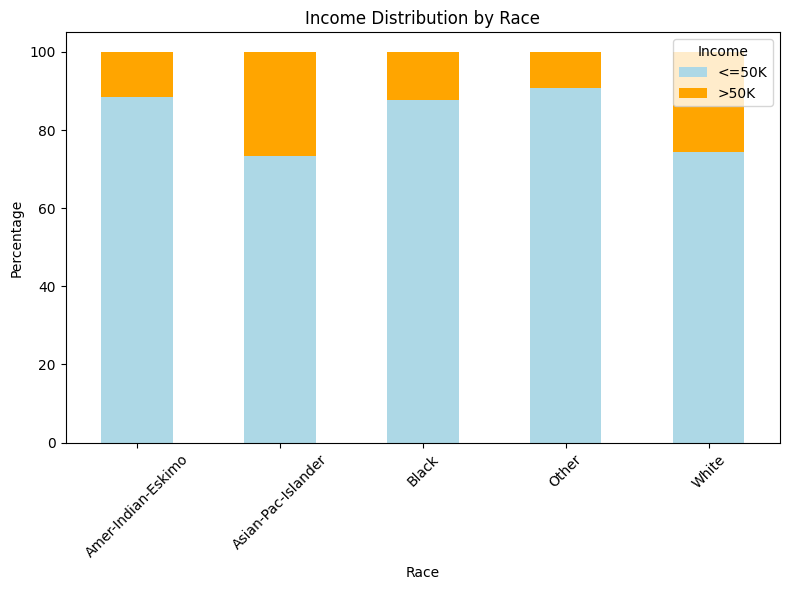

In [ ]:
import matplotlib.pyplot as plt

# Get the distribution table for race
race_dist = result_tables['race']

# Plot as a stacked bar chart
race_dist.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'orange'])

# Add labels and title
plt.title("Income Distribution by Race")
plt.xlabel("Race")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(title="Income")
plt.tight_layout()
plt.show()


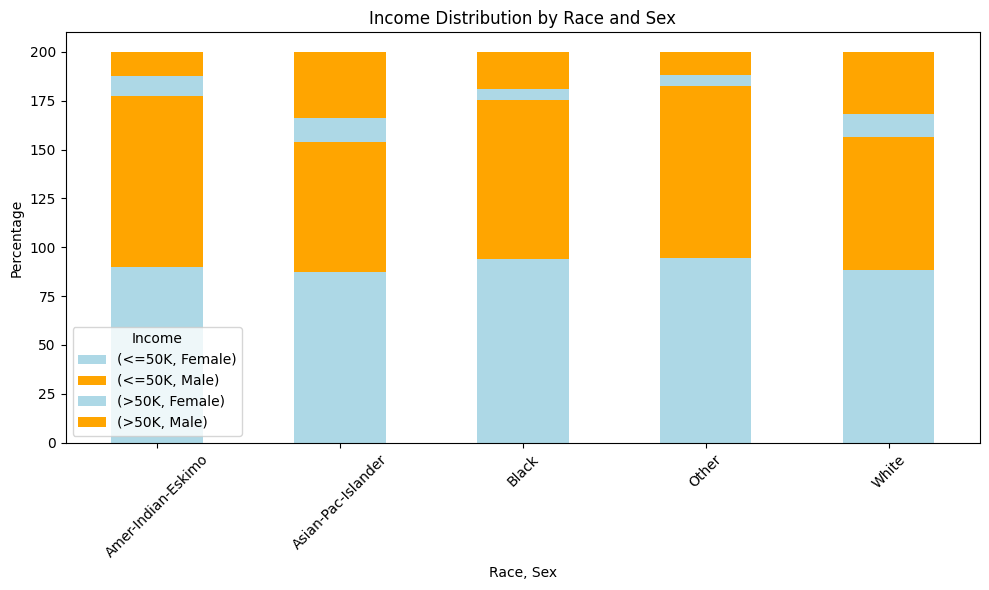

In [ ]:
import matplotlib.pyplot as plt

# Group by both race and sex, then get % distribution of income
grouped = df.groupby(['race', 'sex'])['income'].value_counts(normalize=True).unstack().fillna(0) * 100

# Pivot to get a multi-indexed DataFrame for plotting
stacked_data = grouped.unstack(level=-1)

# Plot
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'orange'])

# Add labels
plt.title("Income Distribution by Race and Sex")
plt.ylabel("Percentage")
plt.xlabel("Race, Sex")
plt.xticks(rotation=45)
plt.legend(title="Income")
plt.tight_layout()
plt.show()


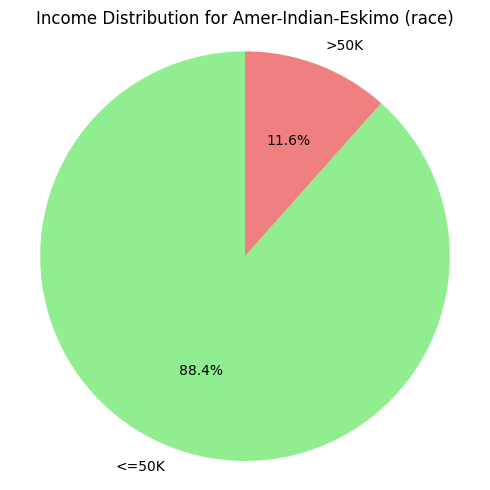

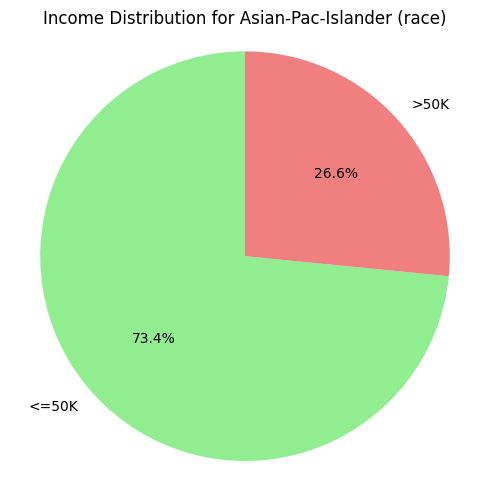

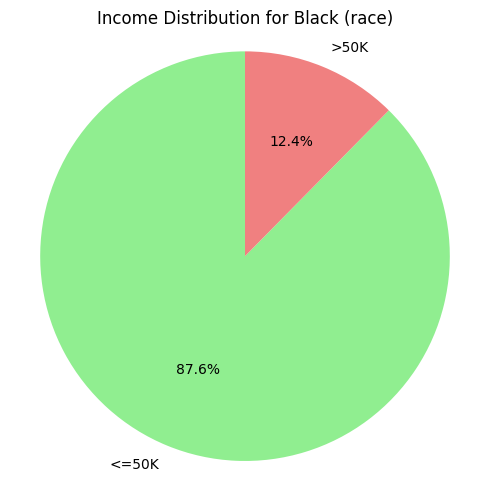

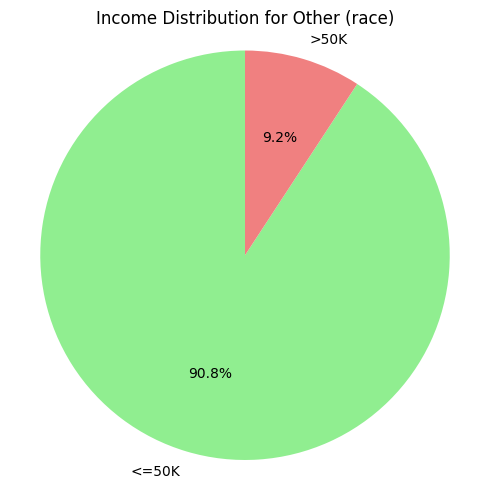

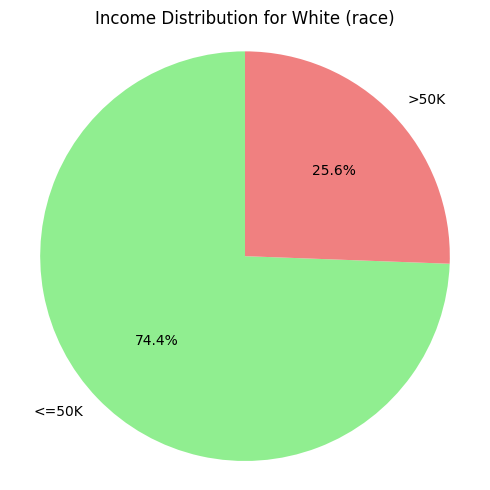

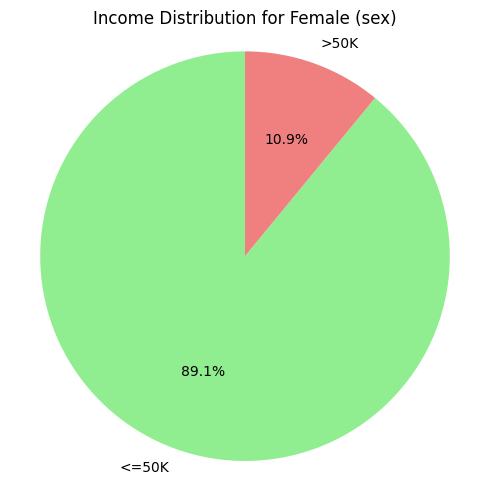

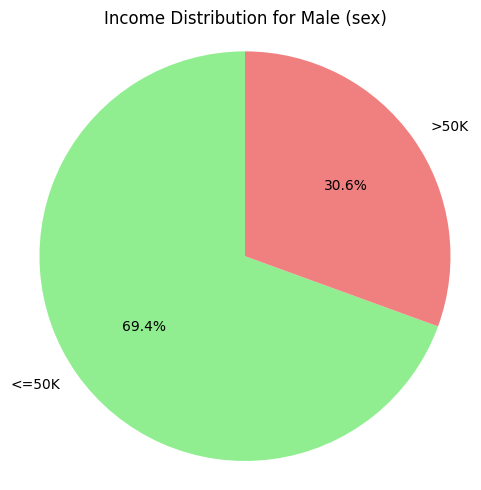

In [ ]:
import matplotlib.pyplot as plt

# Pie charts for each column (race and sex)
for col in columns_to_check:
    table = result_tables[col]

    for group in table.index:
        labels = table.columns
        sizes = table.loc[group]

        plt.figure(figsize=(5, 5))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
        plt.title(f"Income Distribution for {group} ({col})")
        plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
        plt.tight_layout()
        plt.show()


## EDA for Numerical data

### Distribution of numerical features

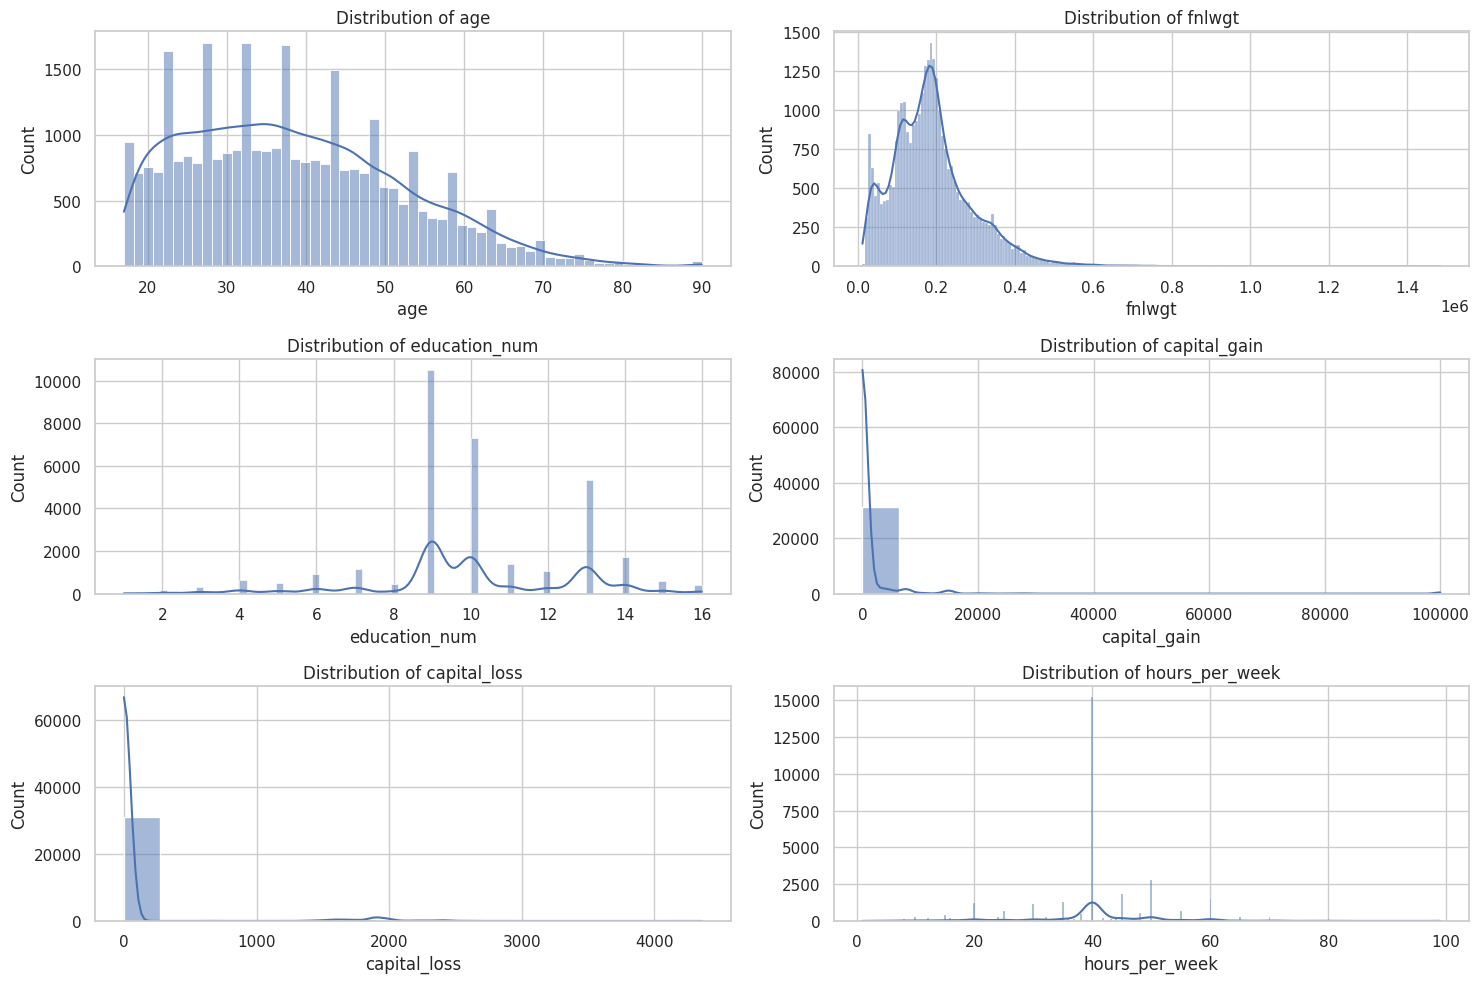

In [ ]:
# Set general style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
#define numerical and categorical features
numerical = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

for i, col in enumerate(numerical):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Numerical features vs Income

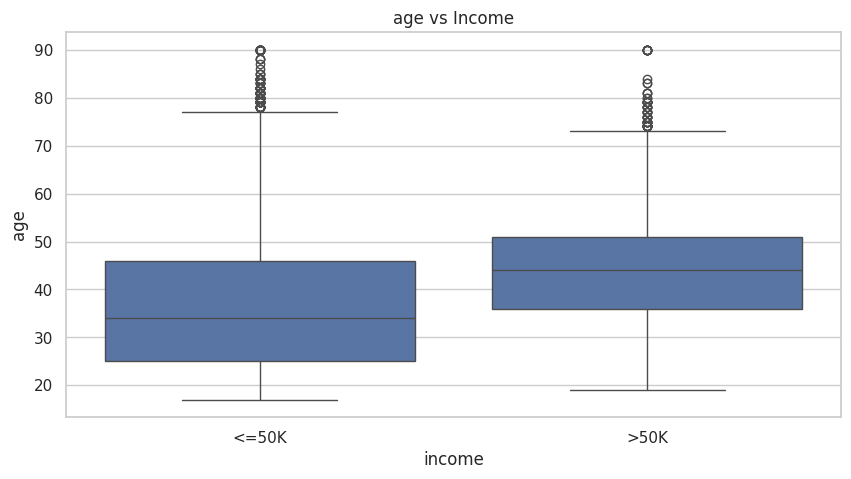

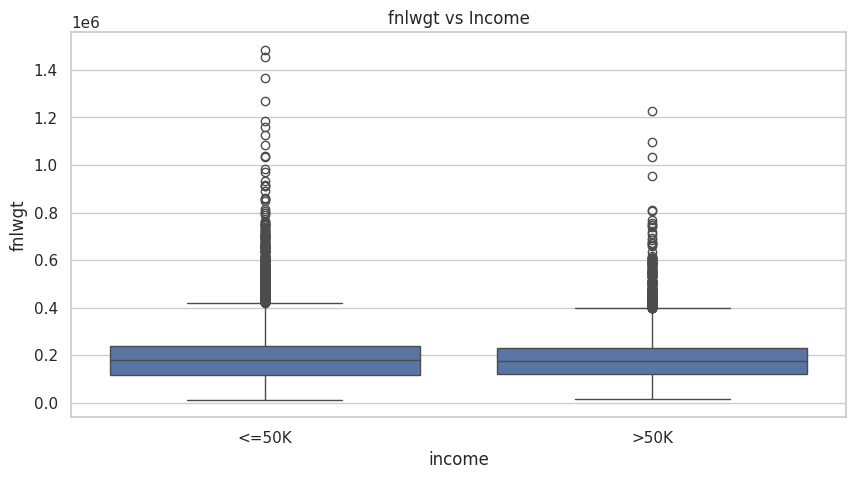

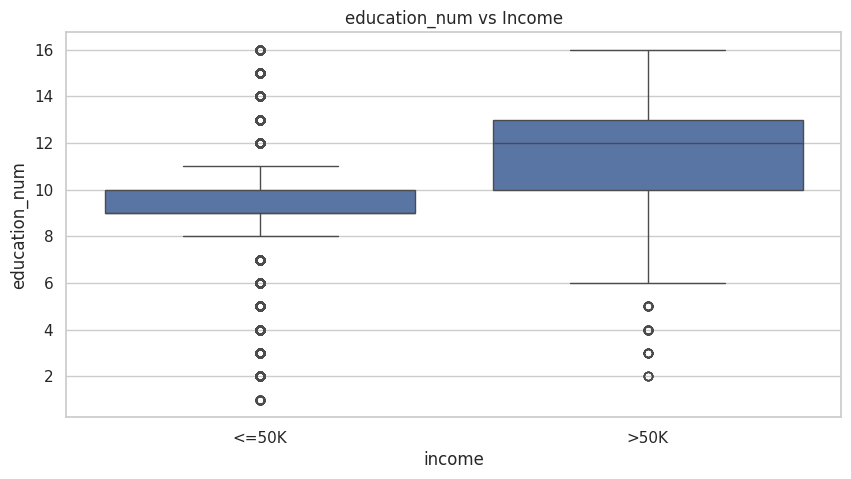

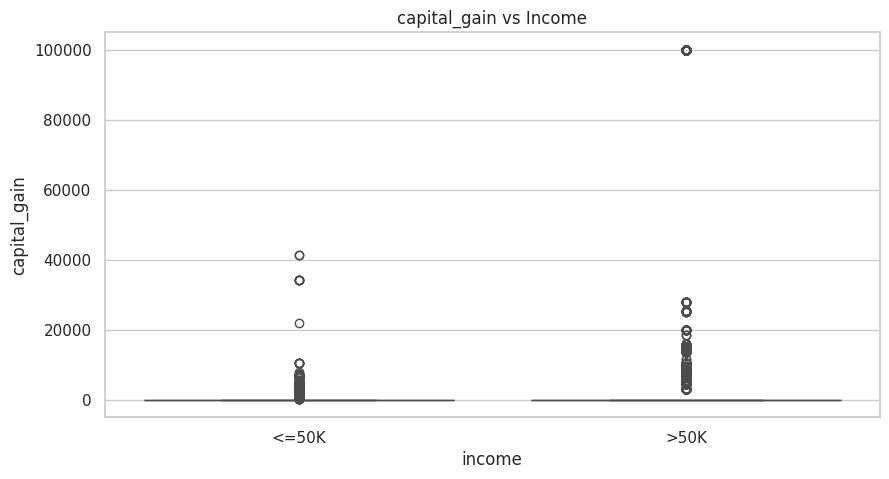

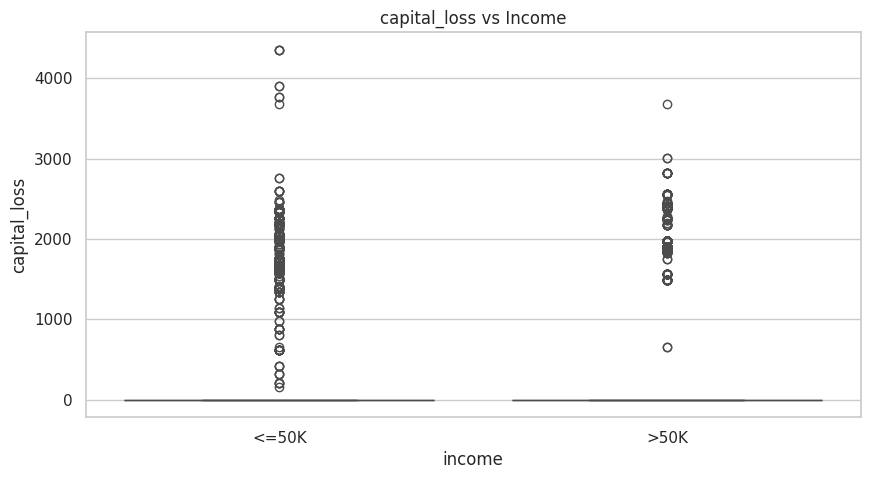

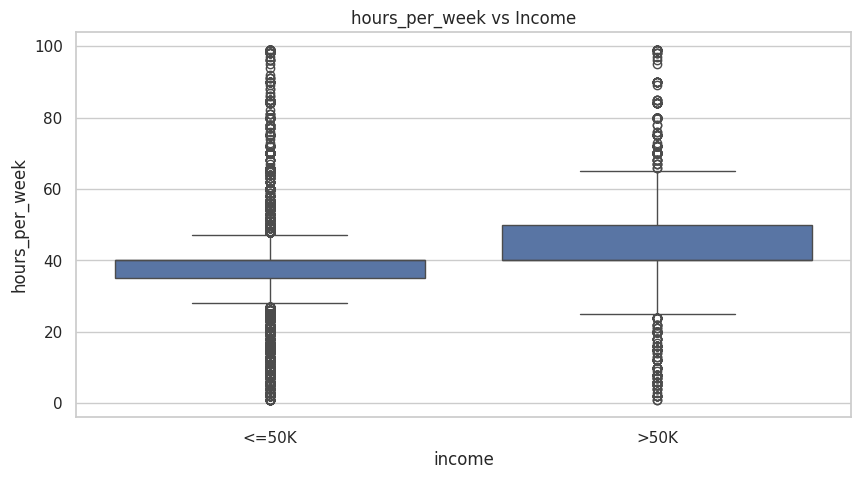

In [ ]:
for col in numerical:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='income', y=col)
    plt.title(f'{col} vs Income')
    plt.show()

### Age with income

In [ ]:
def age_group(x):
  x = int(x)
  if( 16 < x < 26):
    return "17-25"
  if( 25 < x < 31 ):
    return "26-30"
  if( 30 < x < 36 ):
    return "31-35"
  if( 35  < x < 41 ):
    return "36-40"
  if( 40 < x < 46 ):
    return "41-45"
  if( 45 < x < 51 ):
    return "46-50"
  if( 50 < x < 56 ):
    return "51-55"
  if( 55 < x < 61 ):
    return "56-60"
  if( 60 < x < 66 ):
    return "61-65"
  if( 65 < x < 71 ):
    return "66-70"
  else:
    return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

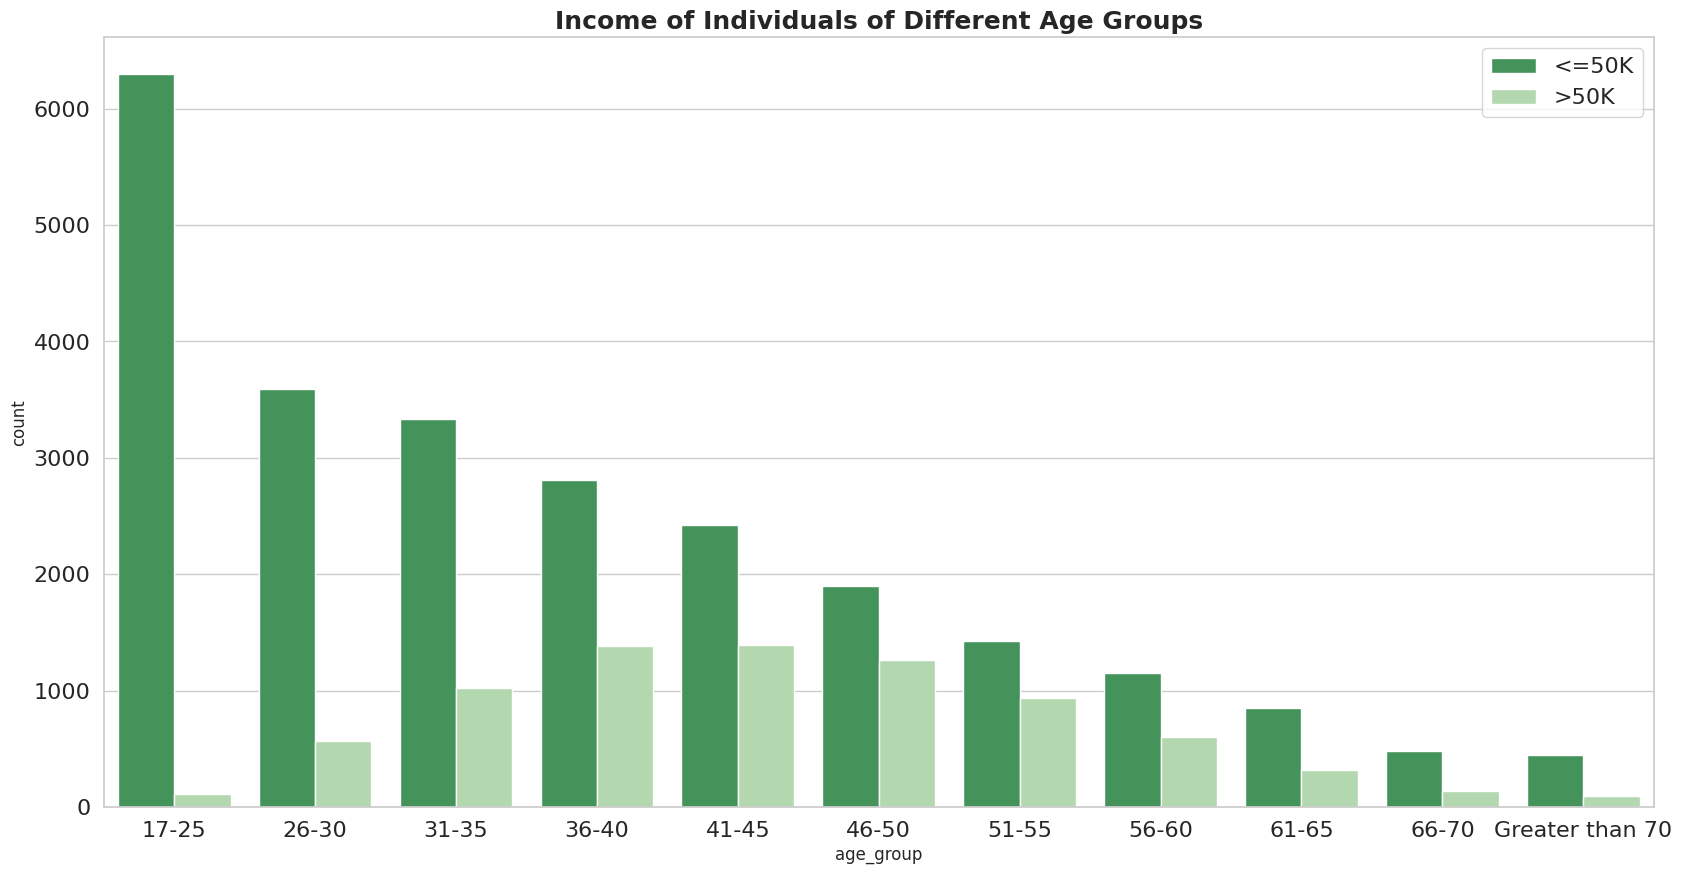

In [ ]:
plt.figure(figsize=(20,10))
order_list = ['17-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65','66-70', 'Greater than 70']
# Melt the dataframe to long-form
df_melted = pd.melt(df, id_vars=['age_group'], value_vars=['income'], var_name='Income', value_name='Count')

# Use countplot with melted dataframe
sns.countplot(x='age_group', hue='Count', data=df_melted, palette='Greens_r', order=order_list)

plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [ ]:
age_income = df.groupby('age_group')['income'].value_counts(normalize=True).unstack() * 100
print(age_income['>50K'].sort_values(ascending=False))

age_group
46-50              39.911588
51-55              39.730072
41-45              36.451782
56-60              34.433694
36-40              32.983544
61-65              27.086882
31-35              23.501034
66-70              22.491909
Greater than 70    17.407407
26-30              13.650565
17-25               1.778194
Name: >50K, dtype: float64


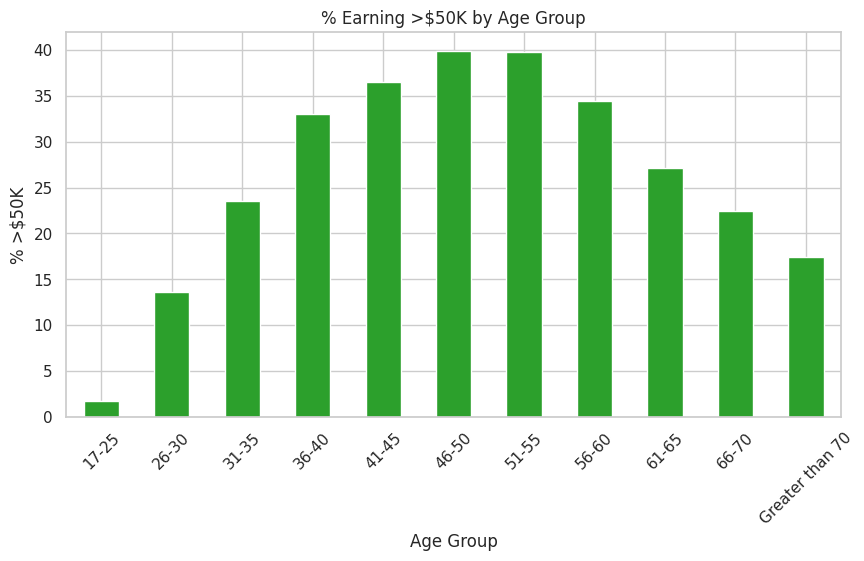

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, 5))
age_income['>50K'].sort_index().plot(kind='bar', color='#2ca02c')
plt.title("% Earning >$50K by Age Group")
plt.xlabel("Age Group")
plt.ylabel("% >$50K")
plt.xticks(rotation=45)
plt.savefig('age_income.png')
plt.show()
files.download('age_income.png')

### Age with Occupation

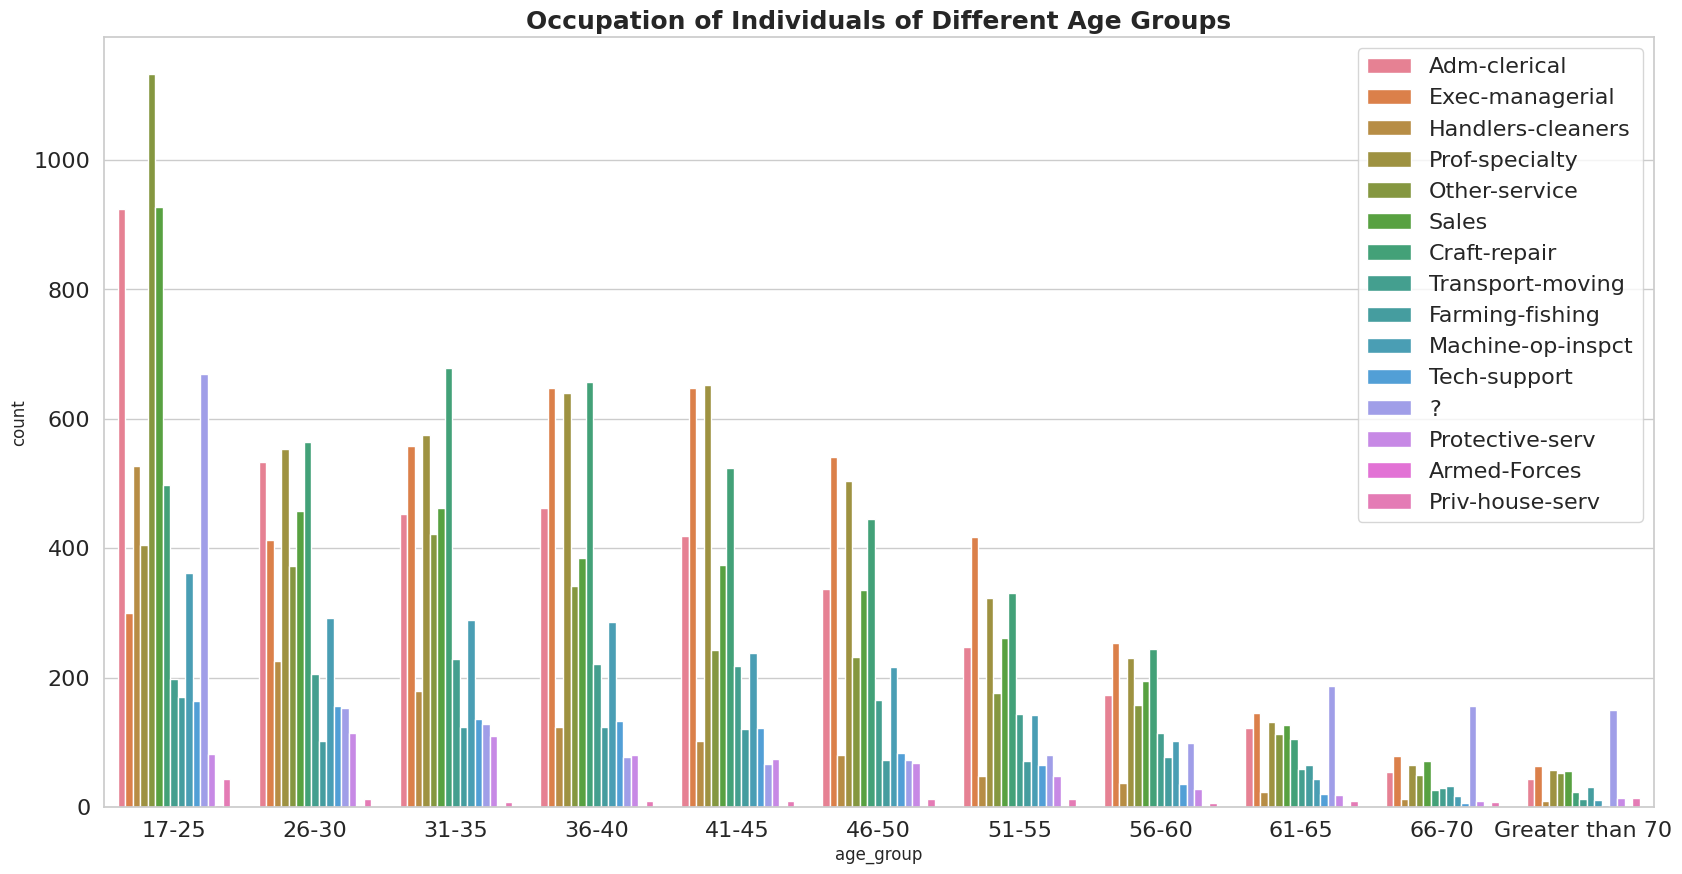

In [ ]:
plt.figure(figsize=(20,10))
# Melt the dataframe to long-form
df_melted = pd.melt(df, id_vars=['age_group'], value_vars=['occupation'], var_name='Occupation', value_name='Count')

# Use countplot with melted dataframe
sns.countplot(x='age_group', hue='Count', data=df_melted, order=order_list)

plt.title('Occupation of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

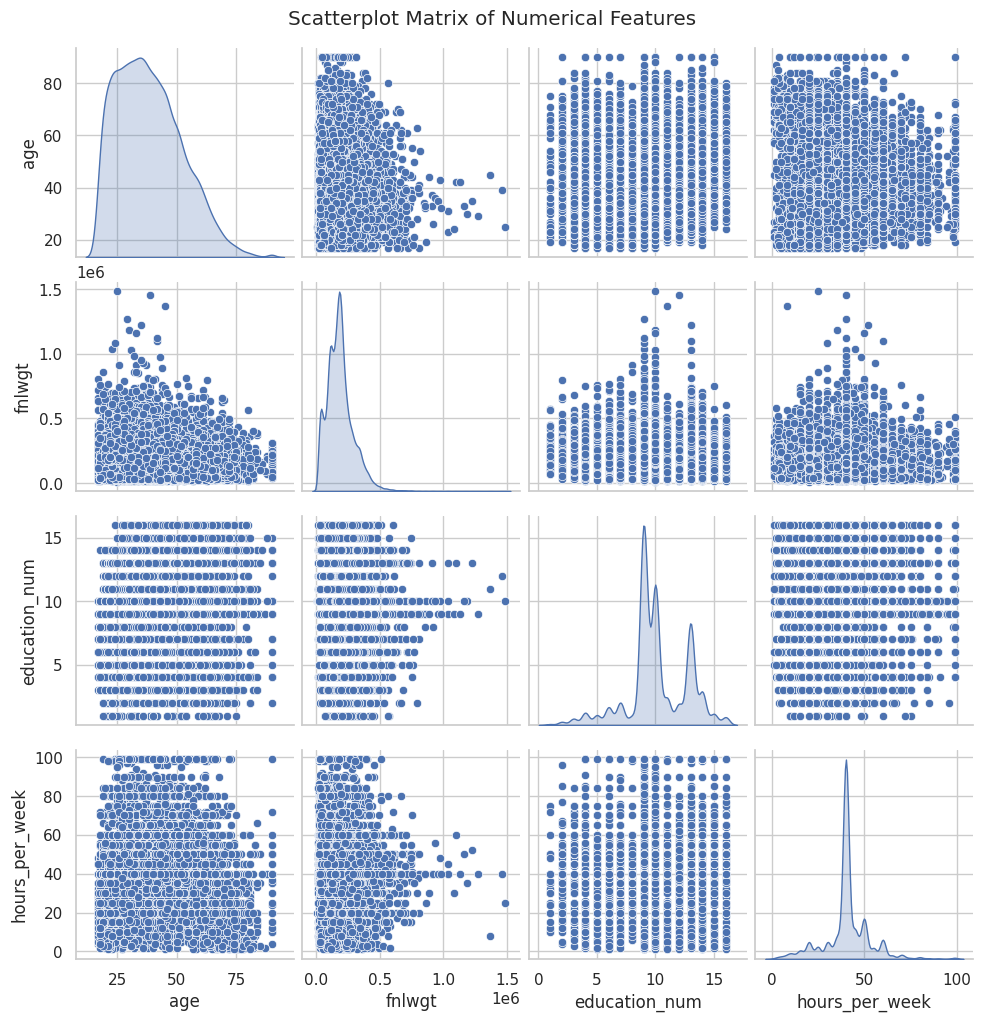

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numerical_cols = ['age', 'fnlwgt', 'education_num', 'hours_per_week']

# Scatterplot matrix (pairplot)
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.suptitle("Scatterplot Matrix of Numerical Features", y=1.02)
plt.show()


there is no linearity between the numerical features

So now, depending on your goal:
If you want linear models (e.g., Linear Regression, Logistic Regression), you may transform features.

Example: polynomial features, binning, interaction terms.

Otherwise, for nonlinear models (e.g., Decision Trees, Random Forests, Gradient Boosting, XGBoost), no need to force linearity — those models can handle nonlinear patterns well!

## EDA for Categorical data

### Count plots for categorical features

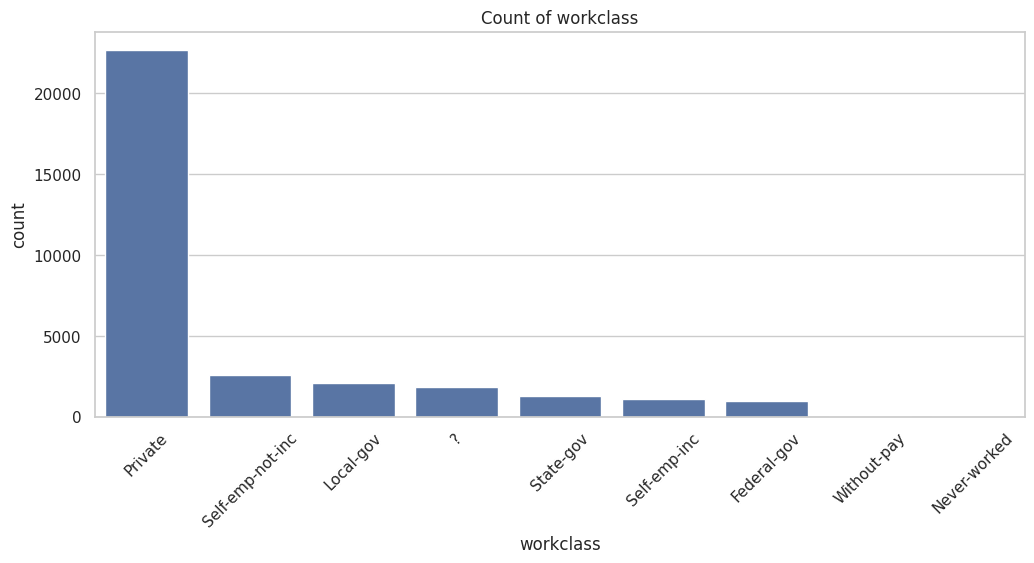

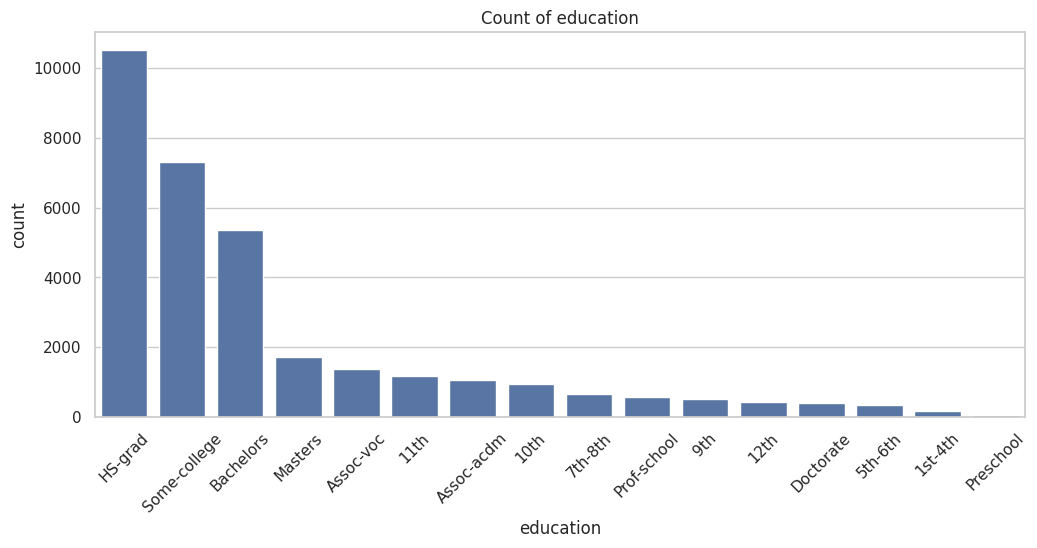

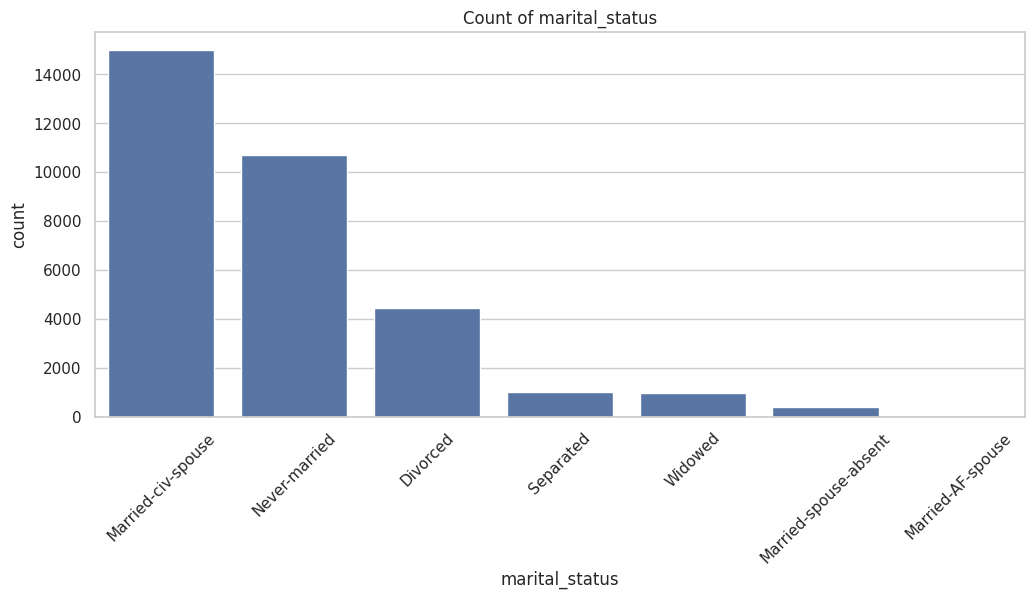

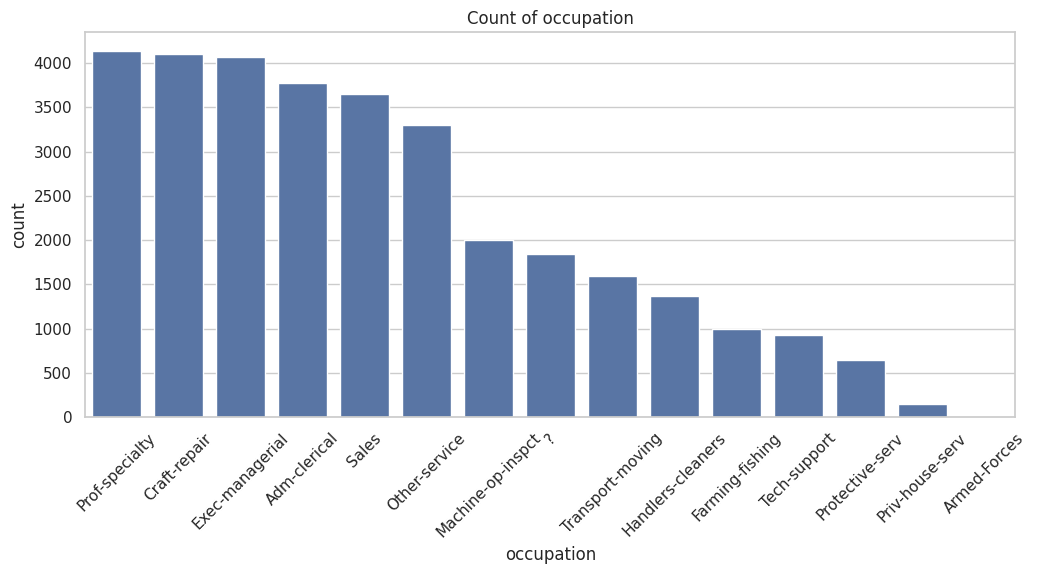

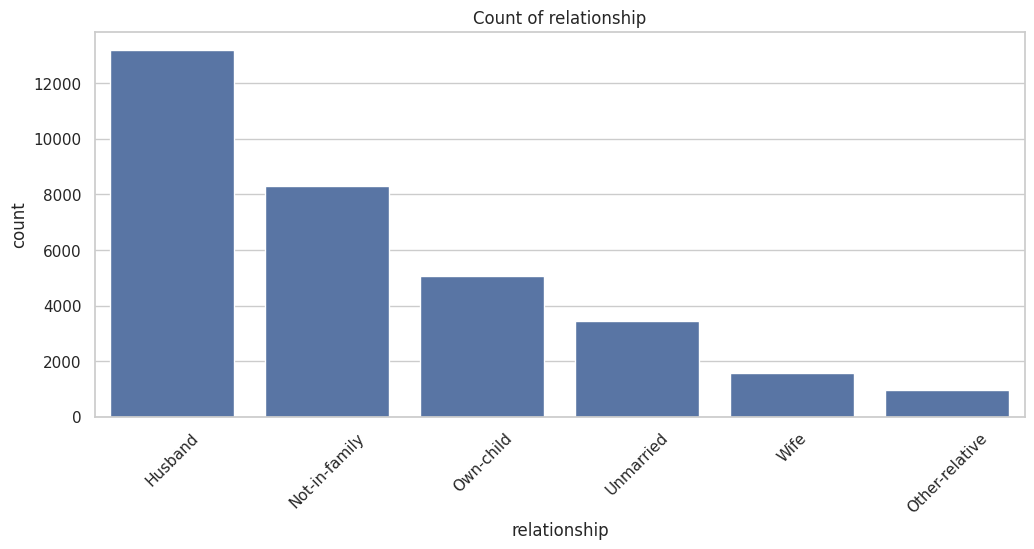

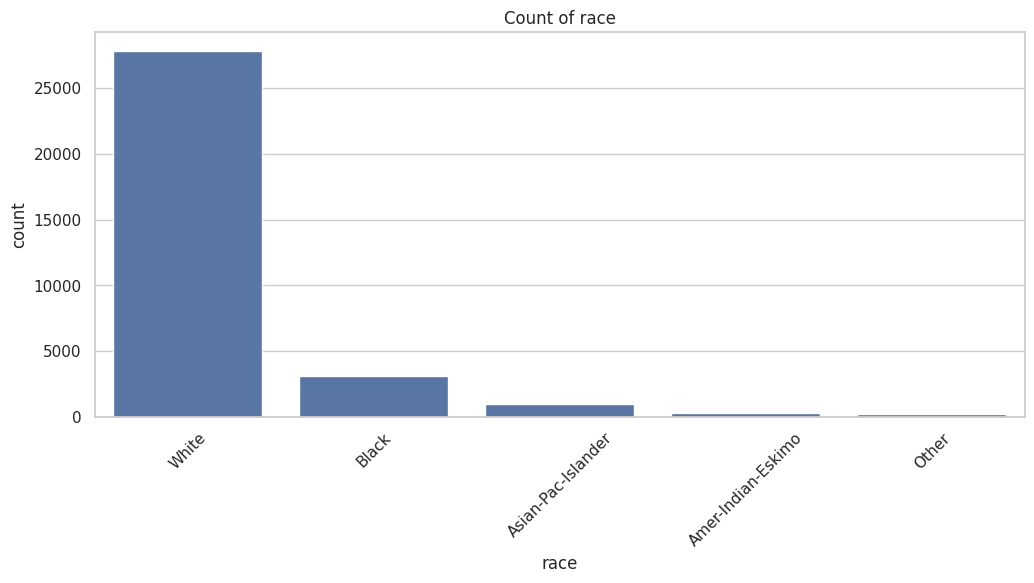

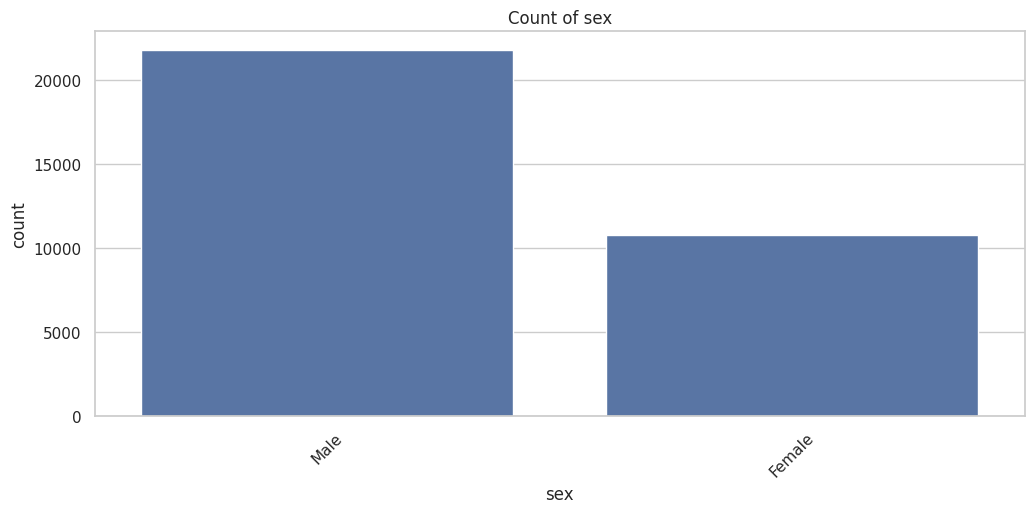

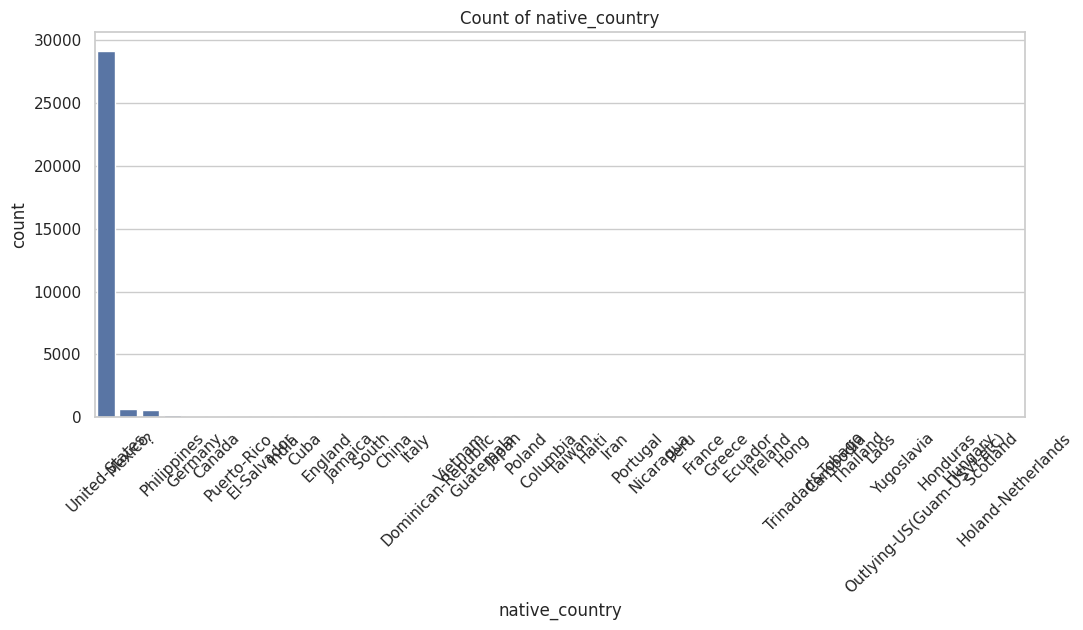

In [ ]:
categorical = ['workclass', 'education', 'marital_status', 'occupation',
               'relationship', 'race', 'sex', 'native_country']

for col in categorical:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
    plt.show()


### Categorical features vs Income

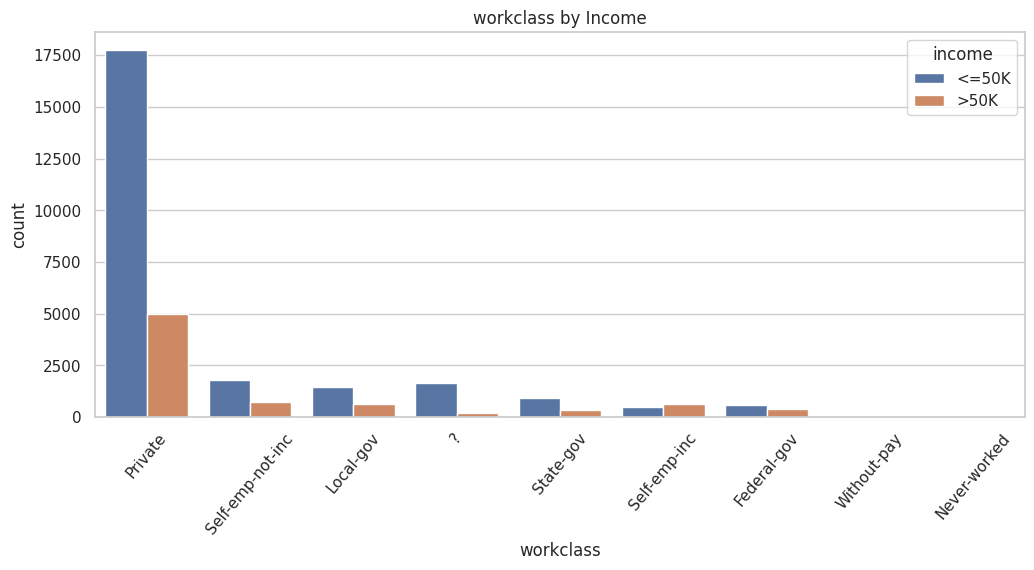

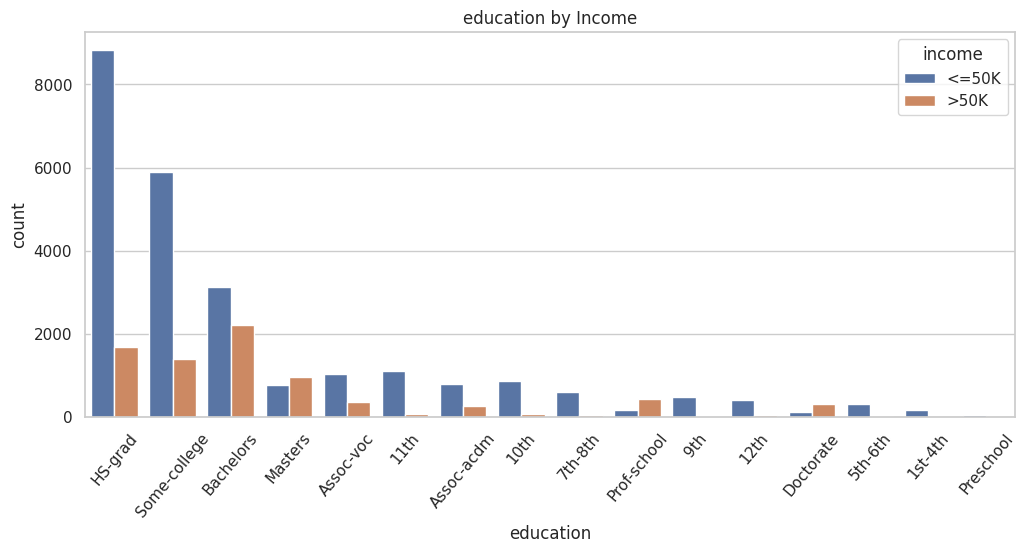

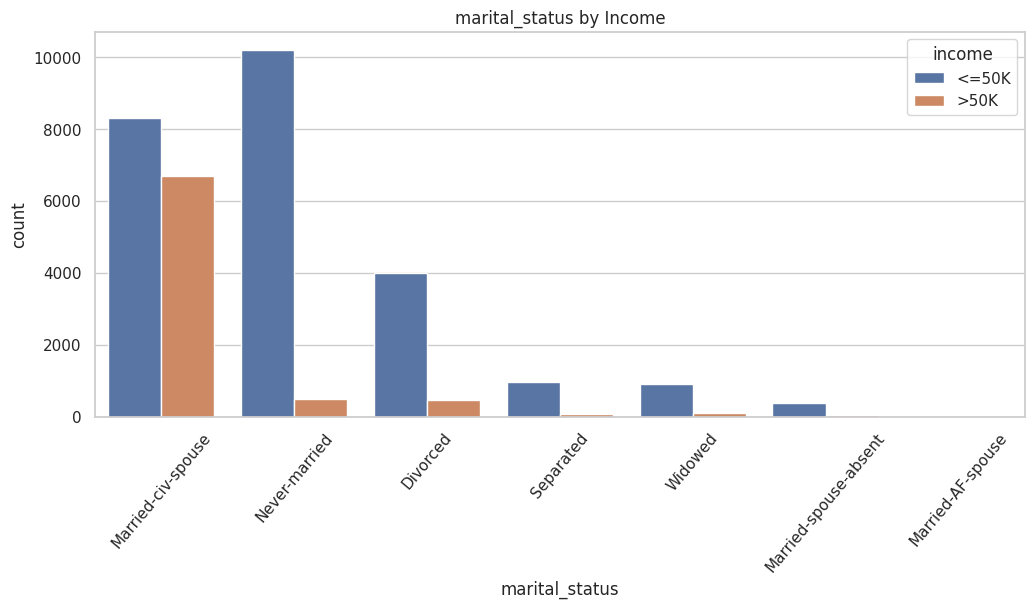

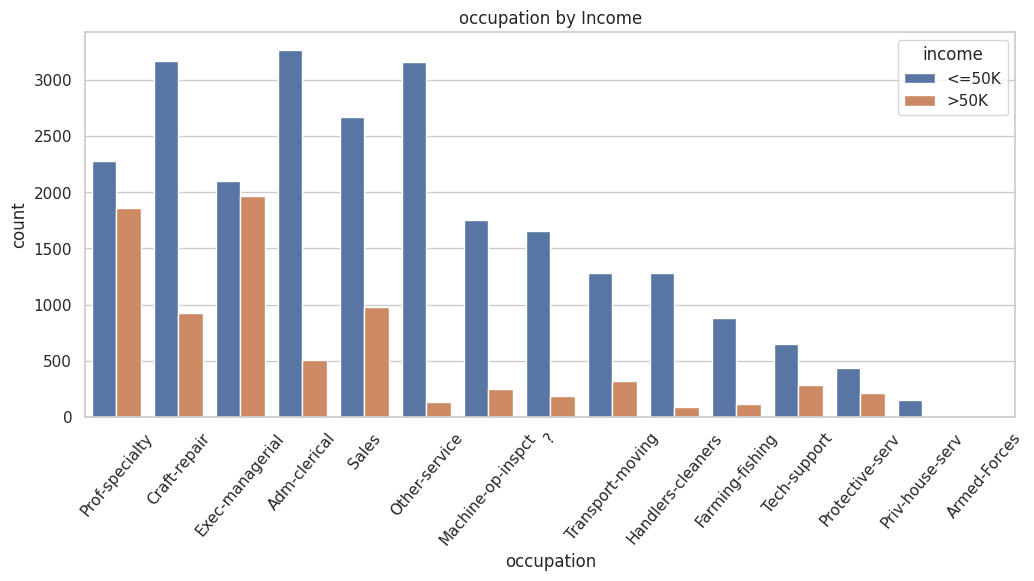

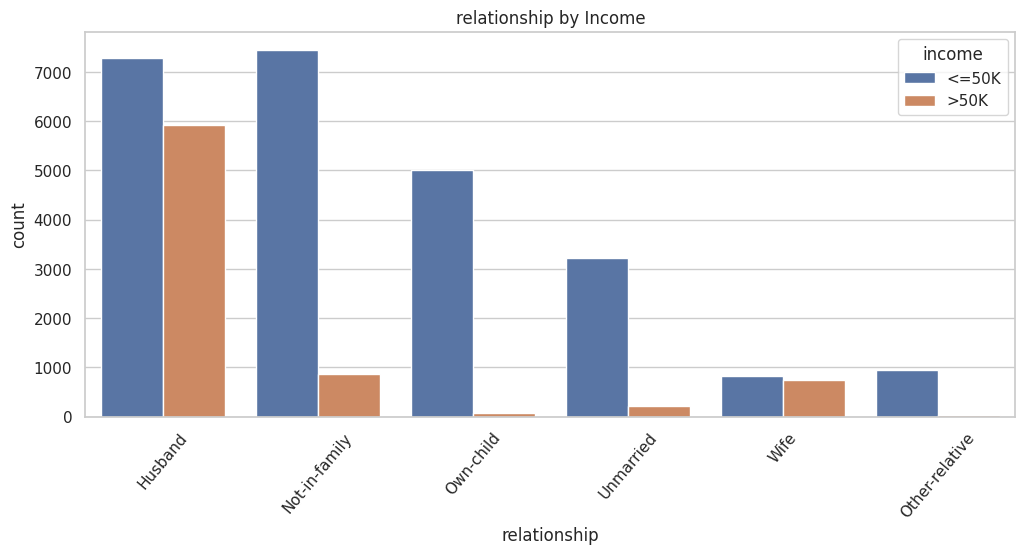

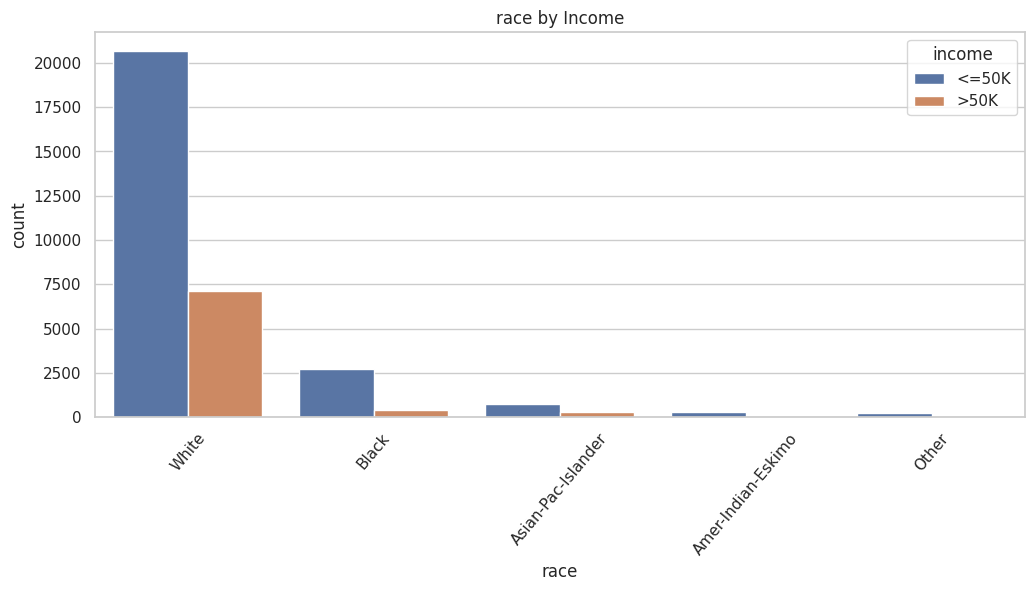

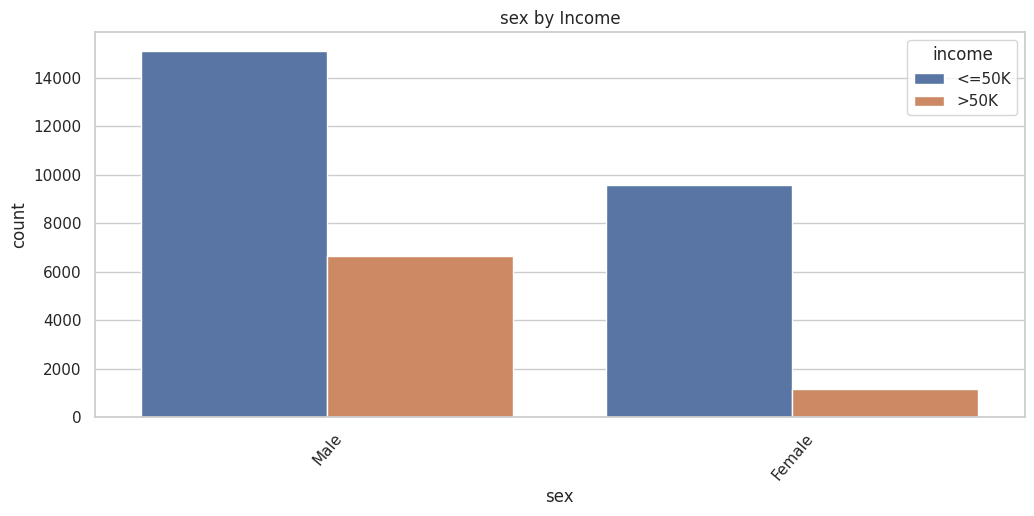

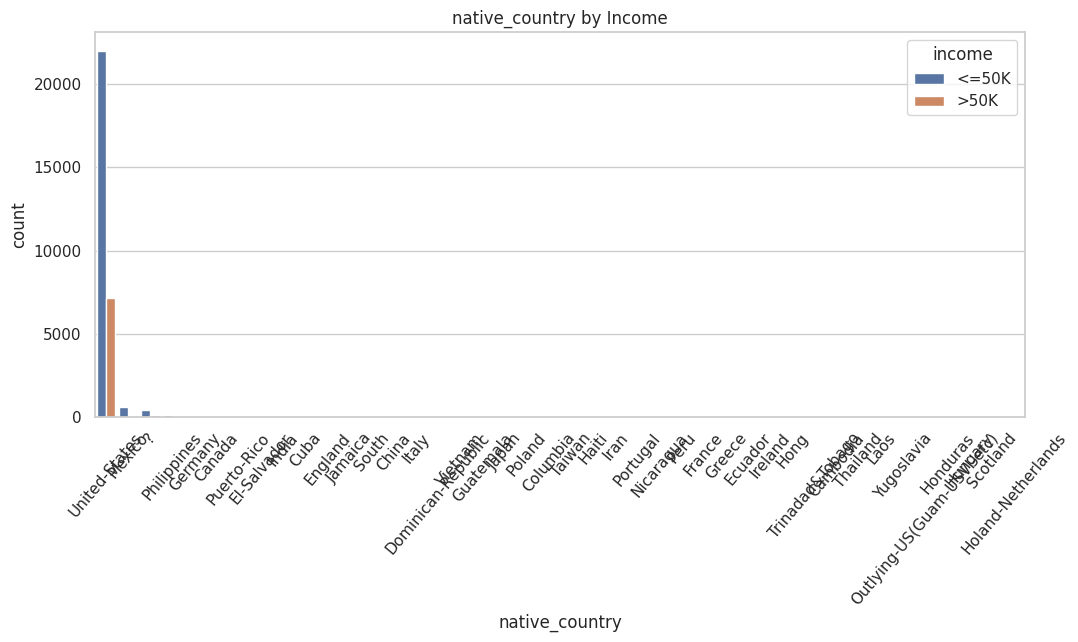

In [ ]:
for col in categorical:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue='income', order=df[col].value_counts().index)
    plt.xticks(rotation=50)
    plt.title(f'{col} by Income')
    plt.show()

### Average Education Number by Education Level

In [ ]:
edu_correlation = df.groupby('education')['education_num'].mean().sort_values()
print(edu_correlation)

education
Preschool        1.0
1st-4th          2.0
5th-6th          3.0
7th-8th          4.0
9th              5.0
10th             6.0
11th             7.0
12th             8.0
HS-grad          9.0
Some-college    10.0
Assoc-voc       11.0
Assoc-acdm      12.0
Bachelors       13.0
Masters         14.0
Prof-school     15.0
Doctorate       16.0
Name: education_num, dtype: float64


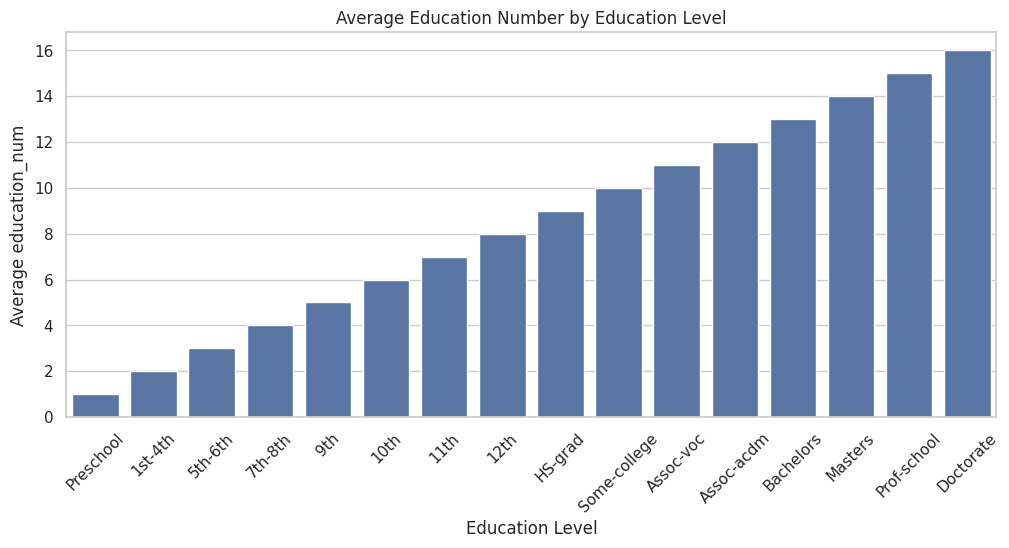

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x='education', y='education_num', order=edu_correlation.index)
plt.xticks(rotation=45)
plt.title('Average Education Number by Education Level')
plt.ylabel('Average education_num')
plt.xlabel('Education Level')
plt.show()


### Race by Occupation

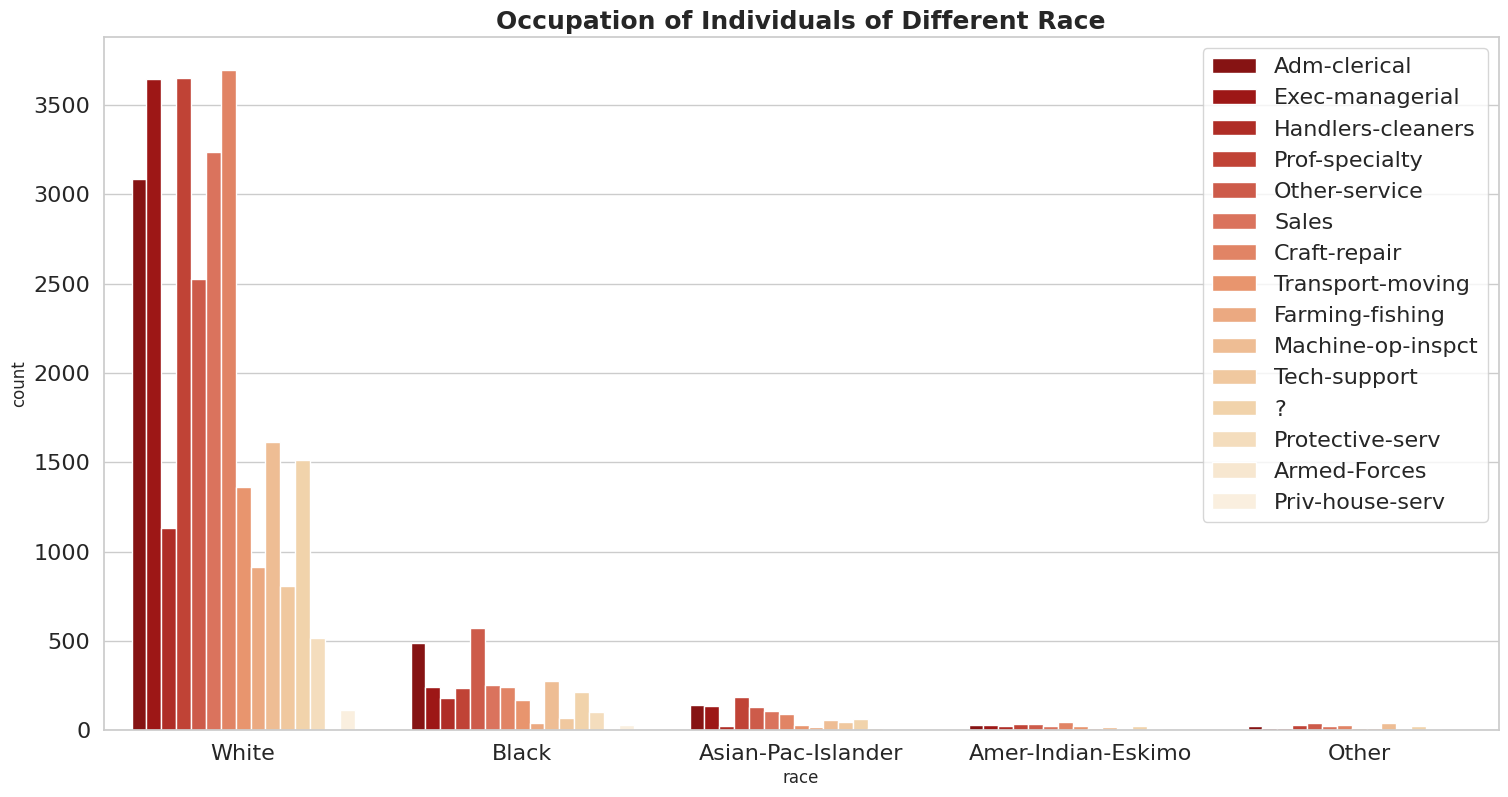

In [ ]:
plt.figure(figsize=(18, 9))

# Melt the dataframe to long-form to use 'hue' correctly
df_melted = pd.melt(df, id_vars=['race'], value_vars=['occupation'], var_name='Occupation', value_name='Count')

# Use countplot with melted dataframe and 'hue'
sns.countplot(x='race', hue='Count', data=df_melted, palette='OrRd_r')
plt.title('Occupation of Individuals of Different Race', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()


### Relationship by age

Are the unmarried people younger or the married people older?



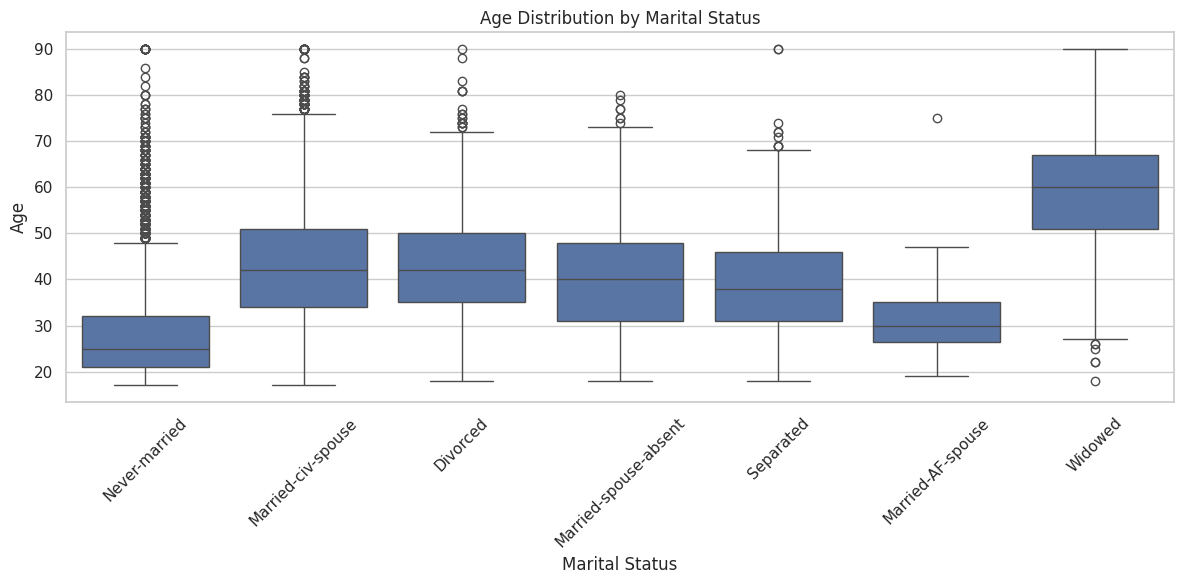

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='marital_status', y='age', data=df)
plt.xticks(rotation=45)
plt.title('Age Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


### Marital Status Distribution by Age Group

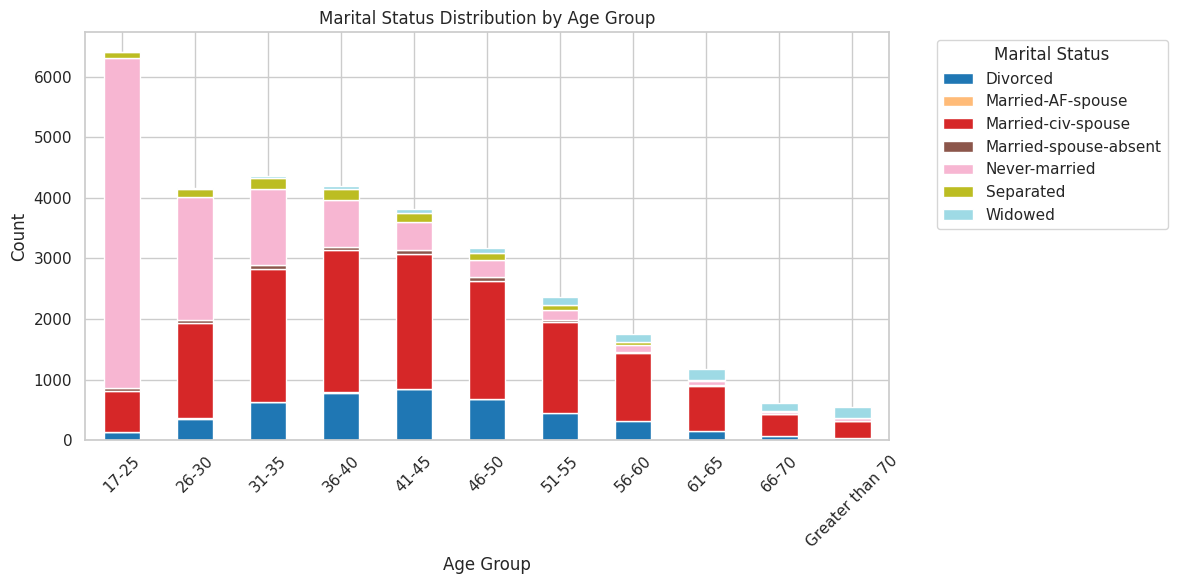

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a crosstab of counts
age_marital_counts = pd.crosstab(df['age_group'], df['marital_status'])

# Step 2: Plot as a stacked bar chart
age_marital_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Step 3: Customize
plt.title('Marital Status Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Education Level with Income

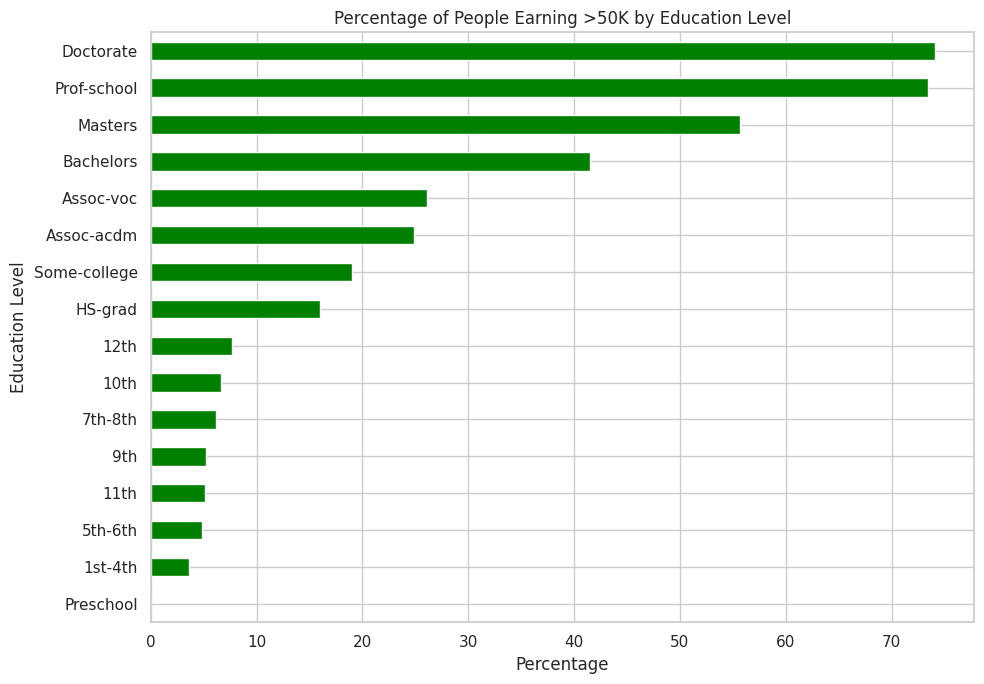

In [ ]:
# Create a crosstab of education and income
edu_income = pd.crosstab(df['education'], df['income'], normalize='index') * 100

# Plot percentage of high income for each education level
edu_income['>50K'].sort_values().plot(kind='barh', figsize=(10, 7), color='green')
plt.title('Percentage of People Earning >50K by Education Level')
plt.xlabel('Percentage')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['education'], df['income'])

# Run chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic = {chi2:.2f}")
print(f"p-value = {p:.4f}")


Chi-square Statistic = 4429.65
p-value = 0.0000


There is a statistically significant association between education level and income.

People with higher education levels (like Bachelor's, Master's, etc.) tend to earn more (more likely to fall in the >50K income group), and this trend is not due to random chance.

### Analyzing Occupation with Education

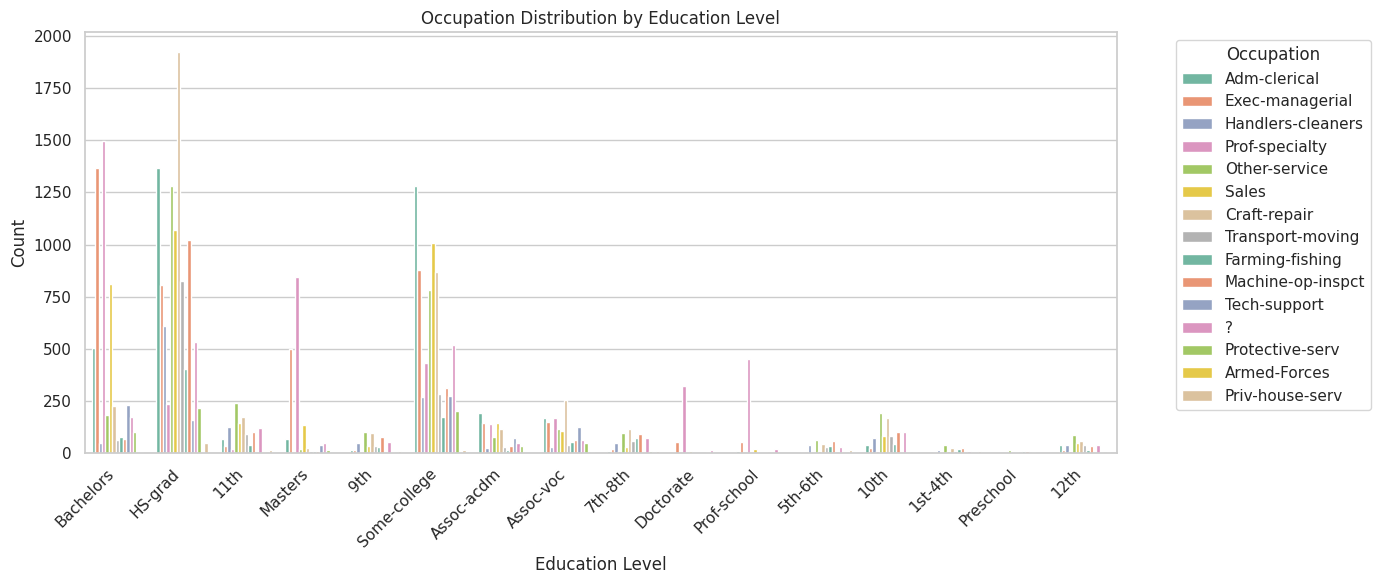

In [ ]:
# Grouped bar chart using seaborn
plt.figure(figsize=(14, 6))
sns.countplot(x='education', hue='occupation', data=df, palette='Set2')
plt.title('Occupation Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
armed_forces_income = df[(df['occupation'] == 'Armed-Forces')]['income'].value_counts()
print("Income Distribution for Armed-Forces:")
print(armed_forces_income)

Income Distribution for Armed-Forces:
income
<=50K    8
>50K     1
Name: count, dtype: int64


In [ ]:
armed_forces_income = df[(df['marital_status'] == 'Married-AF-spouse')]['income'].value_counts()
print("Income Distribution With Marital Status:")
print(armed_forces_income)

Income Distribution With Marital Status:
income
<=50K    13
>50K     10
Name: count, dtype: int64


### Percentage distribution of different Races

In [ ]:
race_distribution = df['race'].value_counts()
print(race_distribution)
race_percentage = (race_distribution / len(df)) * 100
print(race_percentage)

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64
race
White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: count, dtype: float64


### Education VS Occupation.

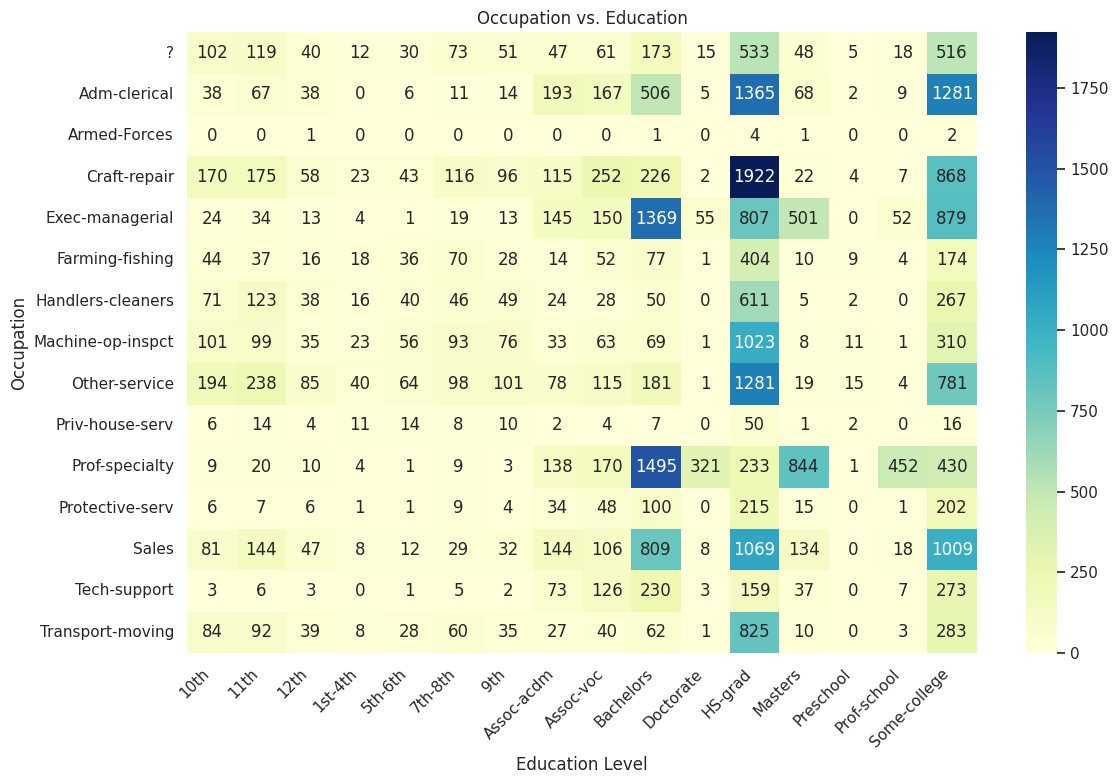

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

   # Create a crosstab of occupation and education
occupation_education = pd.crosstab(df['occupation'], df['education'])

   # Visualize using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(occupation_education, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Occupation vs. Education')
plt.xlabel('Education Level')
plt.ylabel('Occupation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.savefig('occupation_education.png')  # Save as PNG
plt.show()
from google.colab import files
files.download('occupation_education.png')

In [ ]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['occupation'], df['education'])
#Run chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic = {chi2:.2f}")
print(f"p-value = {p:.4f}")

Chi-square Statistic = 15997.78
p-value = 0.0000


There is a significant association between occupation and education in your dataset.

In other words, a person’s education level and their occupation are not independent of each other.

### Analyzing average income (as a proportion) for each workclass

In [ ]:
# Create a numerical income column
df['income_numerical'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Calculate average income for each workclass
average_income_by_workclass = df.groupby('workclass')['income_numerical'].mean()

# Print the results
print(average_income_by_workclass)

workclass
?                   0.104031
Federal-gov         0.386458
Local-gov           0.294792
Never-worked        0.000000
Private             0.218673
Self-emp-inc        0.557348
Self-emp-not-inc    0.284927
State-gov           0.271957
Without-pay         0.000000
Name: income_numerical, dtype: float64


### Education vs Workclass

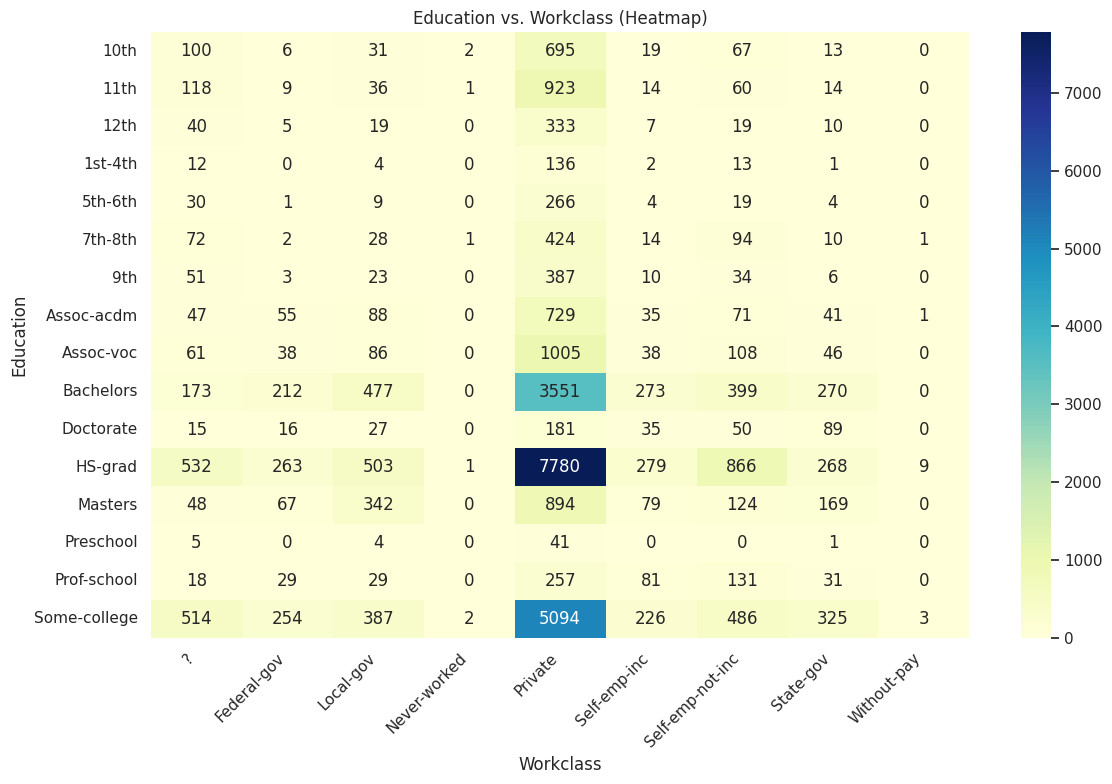

In [ ]:
education_workclass = pd.crosstab(df['education'], df['workclass'])

plt.figure(figsize=(12, 8))
sns.heatmap(education_workclass, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Education vs. Workclass (Heatmap)')
plt.xlabel('Workclass')
plt.ylabel('Education')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Workclass with occupation

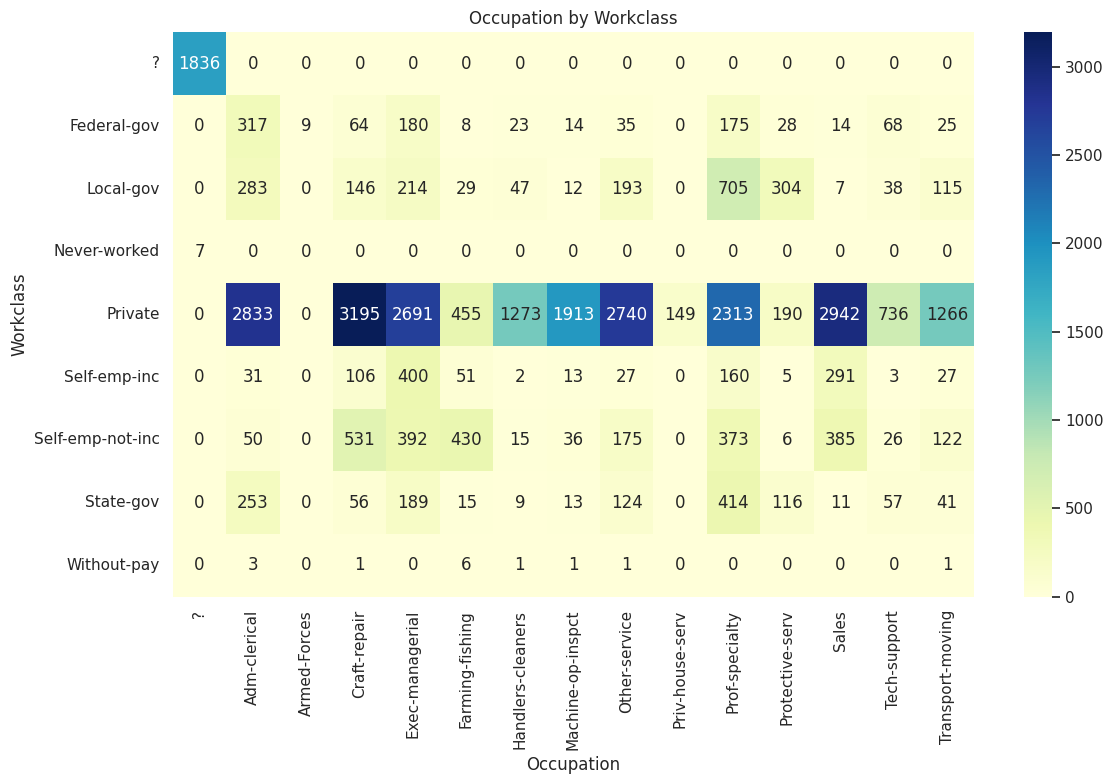

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(df['workclass'], df['occupation']), cmap="YlGnBu", annot=True, fmt='d')
plt.title("Occupation by Workclass")
plt.ylabel("Workclass")
plt.xlabel("Occupation")
plt.tight_layout()
plt.show()


In [ ]:
pd.crosstab(df['workclass'], df['occupation'])


occupation           ?  Adm-clerical  Armed-Forces  Craft-repair  \
workclass                                                          
?                 1836             0             0             0   
Federal-gov          0           317             9            64   
Local-gov            0           283             0           146   
Never-worked         7             0             0             0   
Private              0          2833             0          3195   
Self-emp-inc         0            31             0           106   
Self-emp-not-inc     0            50             0           531   
State-gov            0           253             0            56   
Without-pay          0             3             0             1   

occupation        Exec-managerial  Farming-fishing  Handlers-cleaners  \
workclass                                                               
?                               0                0                  0   
Federal-gov                   180                8                 23   
Local-gov                     214               29                 47   
Never-worked                    0                0                  0   
Private                      2691              455               1273   
Self-emp-inc                  400               51                  2   
Self-emp-not-inc              392              430                 15   
State-gov                     189               15                  9   
Without-pay                     0                6                  1   

occupation        Machine-op-inspct  Other-service  Priv-house-serv  \
workclass                                                             
?                                 0              0                0   
Federal-gov                      14             35                0   
Local-gov                        12            193                0   
Never-worked                      0              0                0   
Private                        1913           2740              149   
Self-emp-inc                     13             27                0   
Self-emp-not-inc                 36            175                0   
State-gov                        13            124                0   
Without-pay                       1              1                0   

occupation        Prof-specialty  Protective-serv  Sales  Tech-support  \
workclass                                                                
?                              0                0      0             0   
Federal-gov                  175               28     14            68   
Local-gov                    705              304      7            38   
Never-worked                   0                0      0             0   
Private                     2313              190   2942           736   
Self-emp-inc                 160                5    291             3   
Self-emp-not-inc             373                6    385            26   
State-gov                    414              116     11            57   
Without-pay                    0                0      0             0   

occupation        Transport-moving  
workclass                           
?                                0  
Federal-gov                     25  
Local-gov                      115  
Never-worked                     0  
Private                       1266  
Self-emp-inc                    27  
Self-emp-not-inc               122  
State-gov                       41  
Without-pay                      1

### Income Distribution by WorkClass

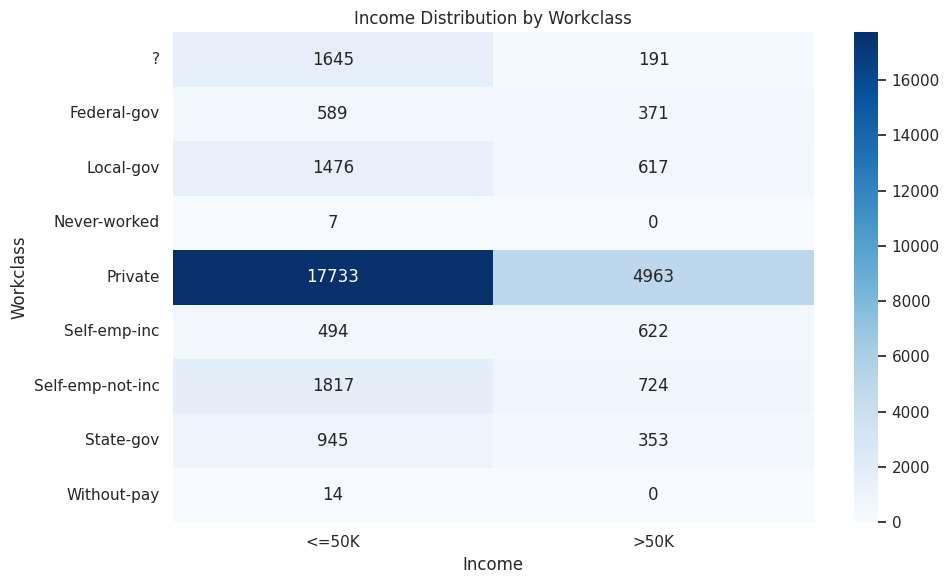

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['workclass'], df['income']), annot=True, fmt='d',cmap='Blues')
plt.title("Income Distribution by Workclass")
plt.ylabel("Workclass")
plt.xlabel("Income")
plt.tight_layout()
plt.show()

# **DATA PREPROCESSING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education_num     32561 non-null  int64 
 5   marital_status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital_gain      32561 non-null  int64 
 11  capital_loss      32561 non-null  int64 
 12  hours_per_week    32561 non-null  int64 
 13  native_country    32561 non-null  object
 14  income            32561 non-null  object
 15  age_group         32561 non-null  object
 16  income_numerical  32561 non-null  int64 
dtypes: int64(7),

### Check for Missing values

In [ ]:
for col in df.columns:
    print(f"\n--- Value counts for '{col}' ---")
    print(df[col].value_counts())


--- Value counts for 'age' ---
age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

--- Value counts for 'workclass' ---
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

--- Value counts for 'fnlwgt' ---
fnlwgt
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
35224      1
30602      1
317681     1
87263      1
151991     1
Name: count, Length: 21648, dtype: int64

--- Value counts for 'education' ---
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th           

In [ ]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [ ]:
df['workclass'].isnull().sum()

np.int64(0)

### Count of Categorical features & Numerical

In [ ]:
# Count the number of unique values in each categorical column
categorical_counts = df[categorical].nunique()
print("Number of unique values in each categorical column:\n", categorical_counts)

# Count the number of numerical features
num_numerical = len(numerical)
print("\nNumber of numerical features:", num_numerical)


Number of unique values in each categorical column:
 workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
dtype: int64

Number of numerical features: 6


In [ ]:
df['marital_status'].value_counts()

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

### Feature Selection

In [ ]:
# Step 1: Handle Missing Values by replacing '?' with NaN
df.replace('?', np.nan, inplace=True)
print("\nStep 1: Replaced '?' with NaN.")
print("Check for NaNs after replacement:")
print(df.isnull().sum())
print("\nCheck dtypes after replacement:")
print(df.info())


Step 1: Replaced '?' with NaN.
Check for NaNs after replacement:
age                    0
workclass           1836
fnlwgt                 0
education              0
education_num          0
marital_status         0
occupation          1843
relationship           0
race                   0
sex                    0
capital_gain           0
capital_loss           0
hours_per_week         0
native_country       583
income                 0
age_group              0
income_numerical       0
dtype: int64

Check dtypes after replacement:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         30725 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education_num     32561 non-null  int64 
 5   marital_status    32561 non

In [ ]:
# Step 2: Redefine Feature Lists based on data types *after* NaN replacement
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# Ensure target is not in feature lists
target_col = 'income'
if target_col in categorical_cols:
    categorical_cols.remove(target_col)
# It's good practice to remove the target from numerical too, although income is object initially
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

In [ ]:
print(f"\nCategorical Features for Selection: {categorical_cols}")
print(f"Numerical Features for Selection: {numerical_cols}")


Categorical Features for Selection: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'age_group']
Numerical Features for Selection: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income_numerical']


In [ ]:
# Create a numerical target for correlation analysis (if not already done)
if 'income_numerical' not in df.columns:
     df['income_numerical'] = df[target_col].apply(lambda x: 1 if x == '>50K' else 0)
     print("\nCreated 'income_numerical' for correlation analysis.")

In [ ]:
# Step 3: Perform Chi-Squared Tests for Categorical Features vs Income
from scipy.stats import chi2_contingency


print("Step 3: Chi-Squared Tests for Categorical Features vs Income")


selected_categorical = []
chi2_results = {} # Optional: store results for review
p_threshold = 0.05 # Define your significance level

# Iterate through categorical columns and perform Chi-squared test
# Use the original target column with categories for Chi-squared
for col in categorical_cols:
    # Drop rows with NaN in the current feature or the target for this test
    temp_df = df.dropna(subset=[col, target_col])

    # Check if the temporary DataFrame is not empty and has enough unique values (>1 in both feature and target)
    if not temp_df.empty and temp_df[col].nunique() > 1 and temp_df[target_col].nunique() > 1:
        contingency_table = pd.crosstab(temp_df[col], temp_df[target_col])

        # Ensure the contingency table is valid for chi-squared:
        # - at least 2 rows and 2 columns
        # - no rows or columns sum to zero (which can happen if dropna results in empty categories)
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1 and \
           (contingency_table.sum(axis=1) > 0).all() and (contingency_table.sum(axis=0) > 0).all():
            try:
                # Suppress the UserWarning about expected counts being less than 5 if you prefer
                # from scipy.stats._stats_py import ExpectedFrequencyWarning
                # warnings.simplefilter('ignore', ExpectedFrequencyWarning)
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                # warnings.simplefilter('default', ExpectedFrequencyWarning) # Reset warning filter

                chi2_results[col] = {'chi2': chi2, 'p_value': p}
                print(f"'{col}' vs '{target_col}': Chi2={chi2:.2f}, p-value={p:.4f}")

                # If p-value is less than the threshold, the feature is statistically associated with the target
                if p < p_threshold:
                    selected_categorical.append(col)
            except ValueError as e:
                 print(f"'{col}' vs '{target_col}': Could not compute chi-squared ({e}). Skipping.")
            except Exception as e: # Catch any other potential errors
                 print(f"'{col}' vs '{target_col}': An error occurred during chi-squared test ({e}). Skipping.")
        else:
             print(f"'{col}' vs '{target_col}': Crosstab too small, has zero rows/columns sums, or constant for chi-squared. Skipping.")
    else:
        print(f"'{col}' vs '{target_col}': Skipping due to insufficient unique values or missing data after dropping NaNs.")


print(f"\nSelected Categorical Features (p < {p_threshold}): {selected_categorical}")


------------------------------
Step 3: Chi-Squared Tests for Categorical Features vs Income
------------------------------
'workclass' vs 'income': Chi2=827.72, p-value=0.0000
'education' vs 'income': Chi2=4429.65, p-value=0.0000
'marital_status' vs 'income': Chi2=6517.74, p-value=0.0000
'occupation' vs 'income': Chi2=3744.90, p-value=0.0000
'relationship' vs 'income': Chi2=6699.08, p-value=0.0000
'race' vs 'income': Chi2=330.92, p-value=0.0000
'sex' vs 'income': Chi2=1517.81, p-value=0.0000
'native_country' vs 'income': Chi2=317.09, p-value=0.0000
'age_group' vs 'income': Chi2=3368.46, p-value=0.0000

Selected Categorical Features (p < 0.05): ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'age_group']


In [ ]:
# Step 4: Perform Correlation Analysis for Numerical Features vs Numerical Income

print("Step 4: Correlation Analysis for Numerical Features vs Numerical Income")


selected_numerical = []
numerical_target_col = 'income_numerical'  # Use the numerical target you created

# Ensure the numerical target column exists
if numerical_target_col in df.columns:
    # Filter out 'age_group' from the numerical_cols list for correlation analysis
    # 'age_group' is categorical, not numerical for correlation purposes
    numerical_cols_for_corr = [col for col in numerical_cols if col != 'age_group']

    # Combine columns for correlation and remove duplicates to avoid .corr() issues
    cols_for_corr = list(dict.fromkeys(numerical_cols_for_corr + [numerical_target_col]))

    # Drop NaNs from the selected numerical columns and the target before calculating correlation
    numerical_corr_df = df[cols_for_corr].dropna()

    if not numerical_corr_df.empty and numerical_corr_df.shape[0] > 1:  # Ensure there's enough data after dropna
        correlation_matrix = numerical_corr_df.corr()

        # Get correlations with the target variable
        if numerical_target_col in correlation_matrix.columns:
            correlation_with_target = correlation_matrix[numerical_target_col].sort_values(ascending=False)
            print("Correlation with 'income_numerical':")
            print(correlation_with_target)

            # Decide on a correlation threshold (e.g., absolute value > 0.05, 0.1, or higher)
            # A lower threshold selects more features, a higher one selects fewer.
            correlation_threshold = 0.05  # You can adjust this threshold based on your EDA
            selected_numerical = [col for col, corr in correlation_with_target.abs().items()
                                  if abs(corr) > correlation_threshold and col != numerical_target_col]
            print(f"\nSelected Numerical Features (|correlation| > {correlation_threshold}): {selected_numerical}")
        else:
            print(f"Error: Numerical target column '{numerical_target_col}' not found in correlation matrix columns.")
            print("Keeping no numerical features due to correlation calculation issue.")
            selected_numerical = []
    else:
        print("Skipping correlation: Not enough data in numerical columns or target after dropping NaNs.")
        print("Keeping all numerical features as correlation could not be calculated.")
        selected_numerical = numerical_cols_for_corr.copy()
else:
    print(f"Error: Numerical target column '{numerical_target_col}' not found in DataFrame.")
    print("Keeping all numerical features as numerical target is missing.")
    selected_numerical = numerical_cols.copy()



------------------------------
Step 4: Correlation Analysis for Numerical Features vs Numerical Income
------------------------------
Correlation with 'income_numerical':
income_numerical    1.000000
education_num       0.335154
age                 0.234037
hours_per_week      0.229689
capital_gain        0.223329
capital_loss        0.150526
fnlwgt             -0.009463
Name: income_numerical, dtype: float64

Selected Numerical Features (|correlation| > 0.05): ['education_num', 'age', 'hours_per_week', 'capital_gain', 'capital_loss']


In [ ]:
# Step 5: Final Feature Set based on Selection Results
# This step combines the selected_numerical (from Step 4) and selected_categorical (from Step 3)

print("Step 5: Finalizing Selected Features")


# Combine the selected numerical and categorical features lists
final_features = selected_numerical + selected_categorical

# Handle the 'occupation' vs 'occupation_grouped' situation
# Prefer original 'occupation' if selected by Chi-squared.
# If 'occupation' was not selected but 'occupation_grouped' was, keep 'occupation_grouped'.
if 'occupation' in final_features and 'occupation_grouped' in final_features:
    final_features.remove('occupation_grouped')
    print("Removed 'occupation_grouped' from final features as 'occupation' was also selected.")
elif 'occupation_grouped' in final_features and 'occupation' not in final_features and 'occupation_grouped' in categorical_cols_current:
     # Check if occupation_grouped is actually a categorical column before deciding to keep it
     print("'occupation_grouped' was selected, 'occupation' was not. Keeping 'occupation_grouped'.")
     pass # Keep occupation_grouped in the list
elif 'occupation' in final_features and 'occupation_grouped' not in final_features:
     print("'occupation' was selected, 'occupation_grouped' was not. Keeping 'occupation'.")
     pass # Keep occupation
# Else case: Neither occupation nor occupation_grouped were selected, so neither is added.


# Ensure unique features just in case
final_features = list(set(final_features))

# Double-check that the target column and the numerical target column are NOT in the feature list
if target_col in final_features:
    final_features.remove(target_col)
if numerical_target_col in final_features:
     final_features.remove(numerical_target_col) # Remove the temporary numerical target


print(f"\nFinal Selected Features for model training (excluding target): {final_features}")


------------------------------
Step 5: Finalizing Selected Features
------------------------------
'occupation' was selected, 'occupation_grouped' was not. Keeping 'occupation'.

Final Selected Features for model training (excluding target): ['hours_per_week', 'capital_gain', 'sex', 'age_group', 'relationship', 'native_country', 'occupation', 'capital_loss', 'workclass', 'race', 'education', 'age', 'education_num', 'marital_status']


In [ ]:
# Step 6: Create a new DataFrame with only the selected features and the target

print("Step 6: Creating DataFrame with Selected Features")


# Use the list of final_features + the original target_col to create the new DataFrame
# Select these columns from the original df (which already has NaNs handled)
# Use .copy() to ensure it's a completely new DataFrame
df_selected_for_pipeline = df[final_features + [target_col]].copy()

print("\nDataFrame structure for Pipeline:")
df_selected_for_pipeline.info()



Step 6: Creating DataFrame with Selected Features

DataFrame structure for Pipeline:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hours_per_week  32561 non-null  int64 
 1   capital_gain    32561 non-null  int64 
 2   sex             32561 non-null  object
 3   age_group       32561 non-null  object
 4   relationship    32561 non-null  object
 5   native_country  31978 non-null  object
 6   occupation      30718 non-null  object
 7   capital_loss    32561 non-null  int64 
 8   workclass       30725 non-null  object
 9   race            32561 non-null  object
 10  education       32561 non-null  object
 11  age             32561 non-null  int64 
 12  education_num   32561 non-null  int64 
 13  marital_status  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(5), object(10)
memory usage: 3.7+ MB


### Possible grouping of some occupations into others

In [ ]:
# Calculate occupation frequencies
occupation_counts = df['occupation'].value_counts()
# Display occupation counts
print("Occupation Counts:\n", occupation_counts)

# Identify occupations with less than 1000 counts
minor_occupations = occupation_counts[occupation_counts < 1000].index
# Display minor occupations
print("\nMinor Occupations (less than 1000 counts):\n", minor_occupations)

# Replace minor occupations with "other"
df['occupation_grouped'] = df['occupation'].apply(lambda x: 'other' if x in minor_occupations else x)

Occupation Counts:
 occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

Minor Occupations (less than 1000 counts):
 Index(['Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv',
       'Armed-Forces'],
      dtype='object', name='occupation')


In [ ]:
df['occupation_grouped'].value_counts()

occupation_grouped
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
other                2729
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Name: count, dtype: int64

### Dropping Columns

In [ ]:
#Changing ? to Unknown
df.replace('?', np.nan, inplace=True)


In [ ]:
#Drop Education_Level, capital_loss, capital_gain, native_by_country**
df_copy = df.copy(deep=True)

In [ ]:
df.drop(['education', 'capital_loss','occupation_grouped', 'capital_gain', 'native_country','occupation_grouped'], axis=1, inplace=True)

In [ ]:
df.drop([ 'occupation','age_group','income_numerical'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours_per_week  32561 non-null  int64 
 9   income          32561 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
df.head(5)

age         workclass  fnlwgt  education_num      marital_status  \
0   39         State-gov   77516             13       Never-married   
1   50  Self-emp-not-inc   83311             13  Married-civ-spouse   
2   38           Private  215646              9            Divorced   
3   53           Private  234721              7  Married-civ-spouse   
4   28           Private  338409             13  Married-civ-spouse   

    relationship   race     sex  hours_per_week income  
0  Not-in-family  White    Male              40  <=50K  
1        Husband  White    Male              13  <=50K  
2  Not-in-family  White    Male              40  <=50K  
3        Husband  Black    Male              40  <=50K  
4           Wife  Black  Female              40  <=50K

### Pipeline

Creating Pipeline to do encoding, standardization and compute missing data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# Step 1: Define X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]   # Assuming 'income' is the last column

# Step 2: Identify feature types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 3: Build transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Step 4: Combine transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Step 5: Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 6: Full preprocessing pipeline (no model yet)
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor)
])


In [ ]:
###Keeping this in here

# Step 7: Fit and transform X
X_processed = pipeline.fit_transform(X)

# Done!
print(" X_processed shape:", X_processed.shape)
print(" y_encoded sample:", y_encoded[:5])

 X_processed shape: (32561, 32)
 y_encoded sample: [0 0 0 0 0]


In [ ]:
# Checking if the pipeline worked
# Get feature names after transformation
feature_names = pipeline.named_steps['preprocessing'].get_feature_names_out()

# Convert to DataFrame for easier viewing
X_df = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed,
                    columns=feature_names)

print(X_df.head())

   num__age  num__fnlwgt  num__education_num  num__hours_per_week  \
0  0.030671    -1.063611            1.134739            -0.035429   
1  0.837109    -1.008707            1.134739            -2.222153   
2 -0.042642     0.245079           -0.420060            -0.035429   
3  1.057047     0.425801           -1.197459            -0.035429   
4 -0.775768     1.408176            1.134739            -0.035429   

   cat__workclass_Federal-gov  cat__workclass_Local-gov  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   cat__workclass_Never-worked  cat__workclass_Private  \
0                          0.0                     0.0   
1                          0.0                     0.0   
2                          0.0                     1.0  

In [ ]:
print(X_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   num__age                                   32561 non-null  float64
 1   num__fnlwgt                                32561 non-null  float64
 2   num__education_num                         32561 non-null  float64
 3   num__hours_per_week                        32561 non-null  float64
 4   cat__workclass_Federal-gov                 32561 non-null  float64
 5   cat__workclass_Local-gov                   32561 non-null  float64
 6   cat__workclass_Never-worked                32561 non-null  float64
 7   cat__workclass_Private                     32561 non-null  float64
 8   cat__workclass_Self-emp-inc                32561 non-null  float64
 9   cat__workclass_Self-emp-not-inc            32561 non-null  float64
 10  cat__workclass_State-g

In [ ]:
y_encoded

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y.value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

# CLASS IMBALANCE

In [ ]:
## Get counts of classes
print(f"Intial no. of instances : {len (y_encoded)}")
print(f"No. of zero class intances (majority) : {sum (y_encoded==0)}")
print(f"No. of one class instances (minority) : {sum(y_encoded==1) }")

Intial no. of instances : 32561
No. of zero class intances (majority) : 24720
No. of one class instances (minority) : 7841


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler ()
X_new, y_new = oversampler.fit_resample(X, y_encoded)
print(f"Oversampled no. of instances : {len (y_new) }")
print(f"No. of zero class intances : {sum(y_new==0)}")
print(f"No. of one class instances: {sum(y_new==1)}")

Oversampled no. of instances : 49440
No. of zero class intances : 24720
No. of one class instances: 24720


# SPLIT THE DATA

In [ ]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(X_new,y_new, test_size=0.2, random_state = 42, stratify=y_new)
print(f" Original size \t X : {X_processed.shape} \t y: {y_encoded.shape}")
print(f" df size \t X : {X_train.shape} \t y: {y_train.shape}")
print(f" Test size \t X : {X_test.shape} \t y: {y_test.shape}")

 Original size 	 X : (32561, 32) 	 y: (32561,)
 df size 	 X : (39552, 9) 	 y: (39552,)
 Test size 	 X : (9888, 9) 	 y: (9888,)


In [ ]:
#Checking if it was really balanced
## Get counts of classes
print(f"Intial no. of instances : {len (y_train)}")
print(f"No. of zero class intances (majority) : {sum (y_train==0)}")
print(f"No. of one class instances (minority) : {sum(y_train==1) }")

Intial no. of instances : 39552
No. of zero class intances (majority) : 19776
No. of one class instances (minority) : 19776


In [ ]:
#Checking if it was really balanced
## Get counts of classes
print(f"Intial no. of instances : {len (y_test)}")
print(f"No. of zero class intances (majority) : {sum (y_test==0)}")
print(f"No. of one class instances (minority) : {sum(y_test==1) }")

Intial no. of instances : 9888
No. of zero class intances (majority) : 4944
No. of one class instances (minority) : 4944


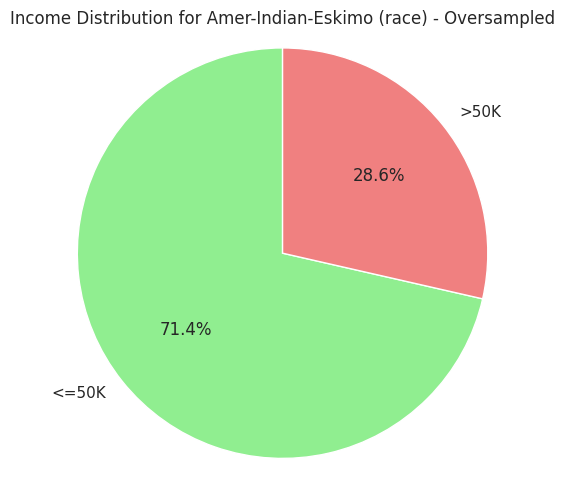

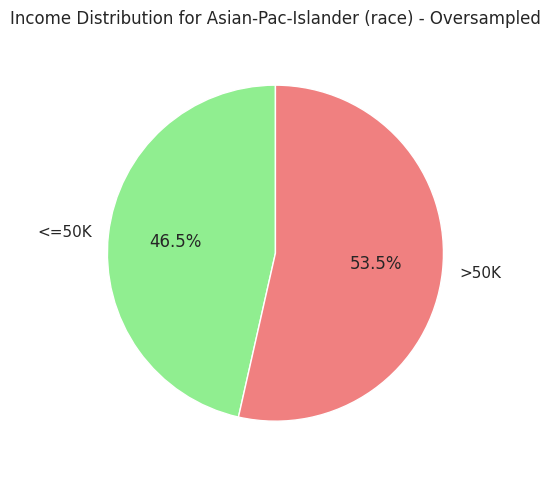

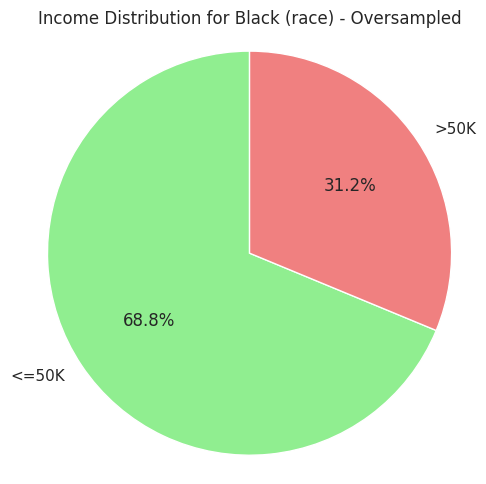

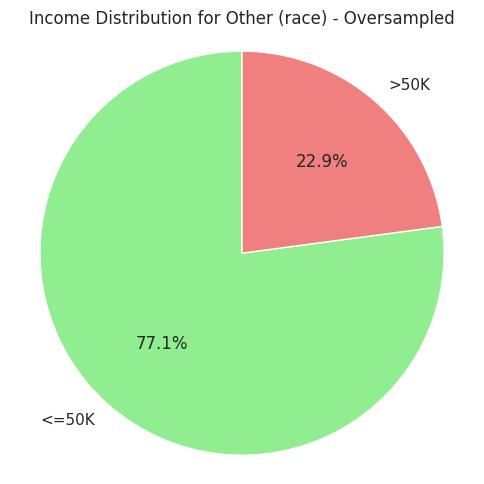

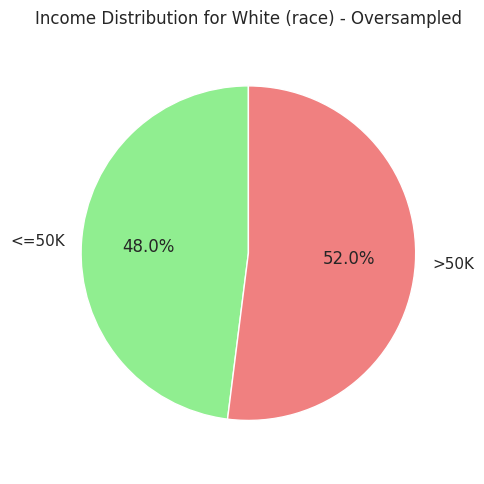

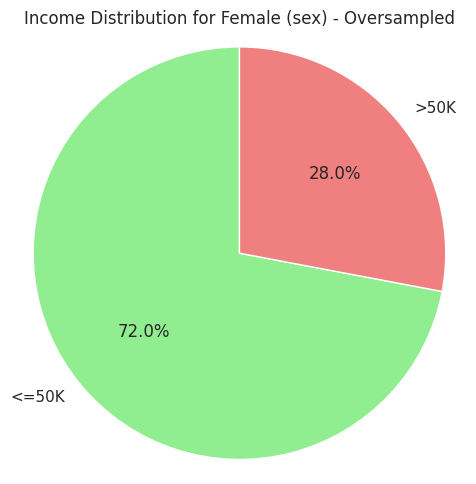

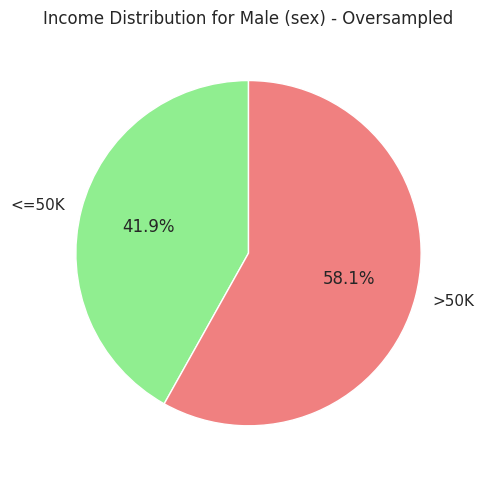

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Recombine oversampled features and labels
X_new_df = pd.DataFrame(X_new, columns=X.columns)  # Adjust column names if needed
y_new_series = pd.Series(y_new, name="income")

# Concatenate into a single DataFrame
df_new = pd.concat([X_new_df, y_new_series], axis=1)

# Specify the column(s) to analyze
columns_to_check = ['race', 'sex']  # or just ['race'] if focusing on one

# For each column, plot pie chart by group
for col in columns_to_check:
    table = df_new.groupby(col)['income'].value_counts(normalize=True).unstack().fillna(0) * 100

    for group in table.index:
        labels = table.columns.map({0: "<=50K", 1: ">50K"})
        sizes = table.loc[group]

        plt.figure(figsize=(5, 5))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
        plt.title(f"Income Distribution for {group} ({col}) - Oversampled")
        plt.axis('equal')  # Draw as a circle
        plt.tight_layout()
        plt.show()


In [ ]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# TRAIN MODELS

Logistic Regression ---Asia

K-Nearest Neighbors (KNN) ---Amal

Support Vector Machine (SVM) ---Sadia

### Logistic Regression

In [ ]:
# Fitting Logistic Regression to df Set
from sklearn. linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Making predictions on the Test Set
y_hat_lr = model_lr.predict(X_test)
# Predicting probabilities
y_hat_prob_lr = model_lr.predict_proba(X_test)

# Print Model Accuracy
accuracy_lr = model_lr.score(X_test, y_test)
print(f"Accuracy: {accuracy_lr:.2f}")
print(y_hat_lr [0:5])
print(y_hat_prob_lr[0:5])



Accuracy: 0.81
[0 1 0 1 0]
[[0.97976856 0.02023144]
 [0.26881103 0.73118897]
 [0.98441404 0.01558596]
 [0.25274921 0.74725079]
 [0.5671341  0.4328659 ]]


#### Logistic Regression: How to get the f1-score, precision, recall, and accuracy

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
lr_f1 = f1_score(y_test, y_hat_lr, average='macro')
lr_precision = precision_score(y_test,y_hat_lr, average='macro')
lr_recall = recall_score(y_test, y_hat_lr, average='macro')
lr_accuracy = accuracy_score(y_test, y_hat_lr)

print("=== Logistic Regression ==")
print(f"F1-score: {lr_f1:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"Accuracy: {lr_accuracy:.4f}\n")

=== Logistic Regression ==
F1-score: 0.8045
Precision: 0.8084
Recall: 0.8050
Accuracy: 0.8050



#### Confusion Metrics for logistic Regression

[[3720 1224]
 [ 704 4240]]


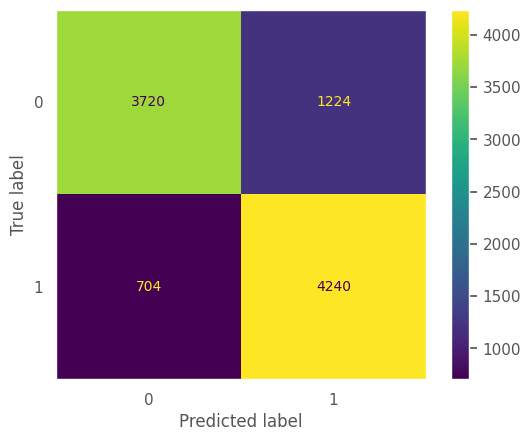

In [ ]:
# Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat_lr)
print (cm)

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(visible=False)
plt.show()

## Classification Report for logistic Regression


In [ ]:
# Print the classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_hat_lr)
print (report)



              precision    recall  f1-score   support

           0       0.84      0.75      0.79      4944
           1       0.78      0.86      0.81      4944

    accuracy                           0.81      9888
   macro avg       0.81      0.81      0.80      9888
weighted avg       0.81      0.81      0.80      9888



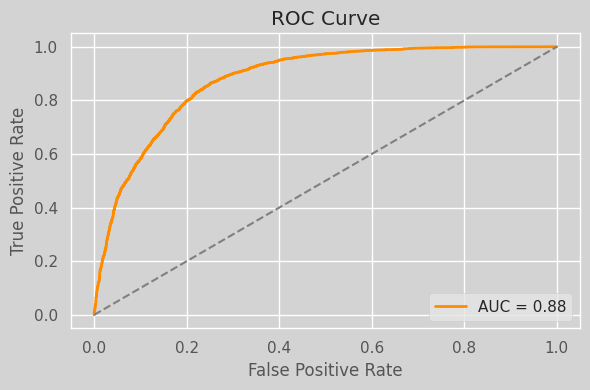

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Get predicted probabilities
# y_scores will contain the probabilities for the positive class (usually class 1)
y_scores = model_lr.predict_proba(X_test)[:, 1]

# Step 2: Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Step 3: Compute AUC score (area under curve)
roc_auc = roc_auc_score(y_test, y_scores)


plt.figure(figsize=(6, 4))

# Set background colors
plt.gca().set_facecolor('lightgrey')  # Axes (plot area)
plt.gcf().set_facecolor('lightgrey')  # Entire figure

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, title, legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Keep gridlines
plt.grid(True)
plt.tight_layout()
plt.show()



#### **We dont need this. We get the same accuracy**

##### Doing GridSearch on Logistic Regression

In [ ]:
# import pickle
# import time
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Assume X_train, y_train, X_test, y_test are defined (sparse matrices)

# # Define parameter grid for Logistic Regression
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga'],
#     'class_weight': [None, 'balanced'],
#     'max_iter': [1000]
# }

# # Initialize Logistic Regression
# model_lr = LogisticRegression(random_state=42)

# # Set up GridSearchCV
# grid_search1 = GridSearchCV(
#     estimator=model_lr,
#     param_grid=param_grid,
#     cv=5,  # 5-fold cross-validation
#     scoring='accuracy',
#     n_jobs=-1,  # Use all available cores
#     verbose=1
# )

# # Measure time for GridSearchCV
# start_time = time.time()

# # Fit GridSearchCV on training data
# grid_search1.fit(X_train, y_train)

# # Calculate elapsed time
# elapsed_time = time.time() - start_time
# minutes = int(elapsed_time // 60)
# seconds = int(elapsed_time % 60)

# # Get the best model
# best_model_lr = grid_search1.best_estimator_

# # Make predictions on the test set
# y_hat_lr = best_model_lr.predict(X_test)
# y_hat_prob_lr = best_model_lr.predict_proba(X_test)

# # Compute test accuracy
# accuracy_lr = accuracy_score(y_test, y_hat_lr)

# #Compute the confusion matrix
# cm = confusion_matrix(y_test, y_hat_lr)

# # Print results
# print("Best Parameters:", grid_search1.best_params_)
# print(f"Best Cross-Validation Accuracy: {grid_search1.best_score_:.4f}")
# print(f"Test Accuracy: {accuracy_lr:.4f}")
# print(f"GridSearchCV Time: {minutes} minutes, {seconds} seconds")
# print("\nConfusion Matrix:")
# print(cm)
# print("[[TN  FP]\n [FN  TP]]")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [ ]:
# # Save the best model to a pickle file
# with open('lr_grid_model.pkl', 'wb') as f:
#     pickle.dump(best_model_lr, f)

# print("Best model saved to 'lr_grid_model.pkl'")

In [ ]:
# with open('lr_grid_model.pkl', 'rb') as file:
#     best_model_lr = pickle.load(file)

# # Print the model
# print("Loaded Best Model:\n",best_model_lr)

In [ ]:
# # Predict on test set
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# y_pred = best_model_lr.predict(X_test)

# # Evaluate performance
# print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


### K-Nearest Neighbors (KNN)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Step 1: Initialize KNN model
# knn = KNeighborsClassifier(n_neighbors=5)  # Start with 5 neighbors

# knn.fit(X_train, y_train)

# # Step 3: Predict on test set
# y_pred = knn.predict(X_test)

# # Step 4: Evaluate
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print("\n Classification Report:\n", classification_report(y_test, y_pred))
# print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Commented it out because I already saved the result in a pickle file

In [ ]:
# import time
# import pickle
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Step 1: Define the parameter grid
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }
# #
# # Step 2: Initialize the KNN model
# knn = KNeighborsClassifier()

# # Step 3: Train with GridSearchCV and time it
# start_time = time.time()
# grid_search2 = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
# grid_search2.fit(X_train, y_train)
# end_time = time.time()

# # Step 4: Save the GridSearchCV object with pickle
# with open('knn_grid_search_model.pkl', 'wb') as f:
#     pickle.dump(grid_search2, f)

# # Step 5: Print performance
# print(f"GridSearchCV took {end_time - start_time:.2f} seconds.")
# print("Best Hyperparameters:", grid_search2.best_params_)

# # Step 6: Predict and evaluate
# best_knn = grid_search2.best_estimator_
# y_pred = best_knn.predict(X_test)
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
# from google.colab import files
# files.download('knn_grid_search_model.pkl')

Ignore this

In [ ]:
# import pickle
# from google.colab import files

# # Upload the file first if it's not in the session
# uploaded = files.upload()

# # Load it
# with open('knn_grid_search_model.pkl', 'rb') as f:
#     grid_search = pickle.load(f)

# # Predict and evaluate again
# best_knn = grid_search.best_estimator_
# y_predknn = best_knn.predict(X_test)

# print("Accuracy Score:", accuracy_score(y_test, y_predknn))
# print("\nClassification Report:\n", classification_report(y_test, y_predknn))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predknn))


In [ ]:
# ## Trying another way
# # Save the best model to a pickle file
# with open('knn_grid_search_model.pkl', 'wb') as f:
#     pickle.dump(best_knn, f)

# print("Best model saved to 'knn_grid_search_model.pkl'")

In [ ]:
# with open('knn_grid_search_model.pkl', 'rb') as file:
#     best_knn = pickle.load(file)

# # Print the model
# print("Loaded Best Model:\n", best_knn)

In [ ]:
# # Predict on test set
# y_predk = best_knn.predict(X_test)

# # Evaluate performance
# print("Accuracy on Test Set:", accuracy_score(y_test, y_predk))
# print("\nClassification Report:\n", classification_report(y_test, y_predk))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predk))

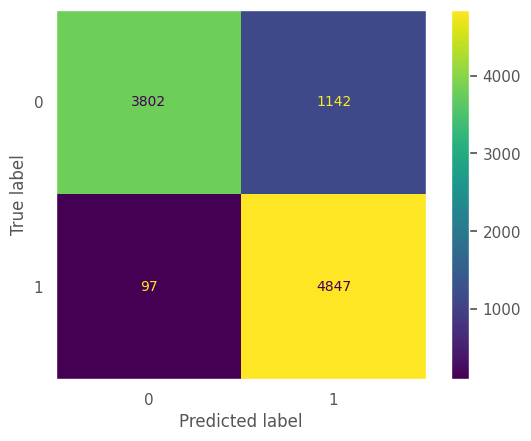

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      4944
           1       0.81      0.98      0.89      4944

    accuracy                           0.87      9888
   macro avg       0.89      0.87      0.87      9888
weighted avg       0.89      0.87      0.87      9888



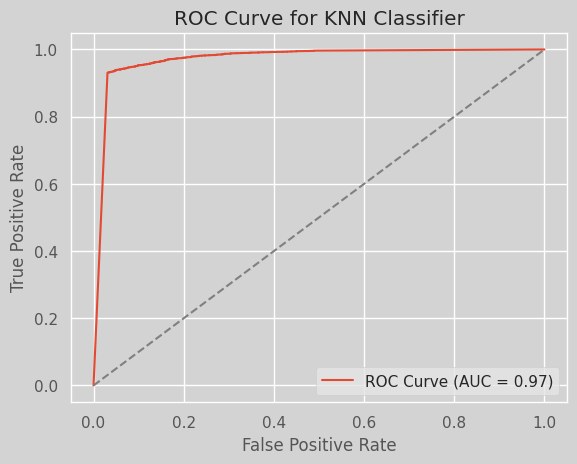

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Train KNN with best hyperparameters
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)

# 2. Make predictions
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]  # For ROC curve

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)
# from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(visible=False)
plt.show()

# 4. Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# 5. ROC Curve
# fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# roc_auc = roc_auc_score(y_test, y_proba)

# plt.figure()
# plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Baseline
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve for KNN Classifier")
# plt.legend(loc="lower right")
# plt.grid(True)
# plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()

# Set grey background
plt.gca().set_facecolor('lightgrey')  # Axes area
plt.gcf().set_facecolor('lightgrey')  # Figure background

# Plot ROC curve
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal baseline

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN Classifier")
plt.legend(loc="lower right")
plt.grid(True)

plt.show()


### Decision Tree Regression

In [ ]:
RANDOM_SEED=42
# Create and Fit a Decision Tree Object
# from sklearn.tree import DecisionTreeRegressor
# model_dt = DecisionTreeRegressor()
# model_dt.fit(X_train, y_train)

# Create and Fit a Decision Tree Object
from sklearn.tree import DecisionTreeClassifier

# Step 1: Initialize Decision Tree model
model_dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
model_dt.fit(X_train, y_train)

# Step 2: Predict on test set
y_hat_dt = model_dt.predict(X_test)


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Step 3: Evaluate
dt_f1 = f1_score(y_test, y_hat_dt, average='macro')
dt_precision = precision_score(y_test, y_hat_dt, average='macro')
dt_recall = recall_score(y_test, y_hat_dt, average='macro')
dt_accuracy = accuracy_score(y_test, y_hat_dt)

print("=== Decision Tree ==")
print(f"F1-score:    {dt_f1:.4f}")
print(f"Precision:   {dt_precision:.4f}")
print(f"Recall:      {dt_recall:.4f}")
print(f"Accuracy:    {dt_accuracy:.4f}\n")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_hat_dt))
print("\nClassification Report:\n", classification_report(y_test, y_hat_dt))

=== Decision Tree ==
F1-score:    0.9000
Precision:   0.9064
Recall:      0.9004
Accuracy:    0.9004

Confusion Matrix:
 [[4150  794]
 [ 191 4753]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.89      4944
           1       0.86      0.96      0.91      4944

    accuracy                           0.90      9888
   macro avg       0.91      0.90      0.90      9888
weighted avg       0.91      0.90      0.90      9888



No need for gridaSearch, Accuracy remains the same

In [ ]:
# import time
# import pickle
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# RANDOM_SEED = 42

# # Step 1: Define hyperparameter grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Step 2: Initialize base Decision Tree classifier
# dt = DecisionTreeClassifier(random_state=RANDOM_SEED)

# # Step 3: Set up GridSearchCV
# grid_search_dt = GridSearchCV(estimator=dt,
#                                param_grid=param_grid,
#                                cv=3,
#                                scoring='accuracy',
#                                verbose=1,
#                                n_jobs=-1)

# # Step 4: Train and time it
# start_time = time.time()
# grid_search_dt.fit(X_train, y_train)
# end_time = time.time()

# # Step 5: Save best model
# with open('decision_tree_grid_model.pkl', 'wb') as f:
#     pickle.dump(grid_search_dt, f)

# # Step 6: Load best estimator and predict
# best_dt_model = grid_search_dt.best_estimator_
# y_hat_dt = best_dt_model.predict(X_test)

# # Step 7: Print results
# print(f"\nGridSearchCV took {end_time - start_time:.2f} seconds.")
# print("Best Hyperparameters:", grid_search_dt.best_params_)
# print("Test Accuracy (Best Estimator):", accuracy_score(y_test, y_hat_dt))

# print("\nClassification Report:\n", classification_report(y_test, y_hat_dt))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_hat_dt))


In [ ]:
# # Load it
# with open('decision_tree_grid_model.pkl', 'rb') as f:
#     model_dt = pickle.load(f)
# # Print the model
# print("Loaded Best Model:\n", model_dt)


In [ ]:
# # Predict on test set
# y_preddec = model_dt.predict(X_test)

# # Evaluate performance
# print("Accuracy on Test Set:", accuracy_score(y_test, y_preddec))
# print("\nClassification Report:\n", classification_report(y_test, y_preddec))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_preddec))

### XG Boost

In [ ]:
# import xgboost as xgb
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Initialize XGBoost classifier
# xgb_clf = xgb.XGBClassifier(
#     objective='binary:logistic',
#     eval_metric='logloss',
#     use_label_encoder=False,
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=3,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42
# )

# # Train the model
# xgb_clf.fit(X_train, y_train)

# # Predict on test set
# y_pred = xgb_clf.predict(X_test)

# # Accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.tight_layout()
# plt.show()


In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# # Predict probabilities for the positive class
# y_proba = xgb_clf.predict_proba(X_test)[:, 1]

# # Calculate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# # Calculate AUC
# auc_score = roc_auc_score(y_test, y_proba)

# # Plot ROC curve
# plt.figure(figsize=(6, 4))
# plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.2f})', color='darkorange')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.grid(True)
# plt.show()


Doing GridSearch Here. Commented out because I already saved the result in a pickle

In [ ]:
# import time
# import pickle
# import xgboost as xgb
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.preprocessing import StandardScaler
# from scipy.stats import uniform, randint

# # Define parameter distribution for RandomizedSearchCV
# param_dist = {
#     'n_estimators': randint(100, 500),           # Number of trees
#     'learning_rate': uniform(0.01, 0.29),        # Range: 0.01 to 0.3
#     'max_depth': randint(3, 10),                 # Tree depth
#     'subsample': uniform(0.5, 0.5),              # Range: 0.5 to 1.0
#     'colsample_bytree': uniform(0.5, 0.5),       # Range: 0.5 to 1.0
#     'gamma': uniform(0, 5),                      # Min loss reduction
#     'reg_lambda': uniform(0, 10)                 # L2 regularization
# }

# # Initialize XGBoost classifier
# xgb_clf = xgb.XGBClassifier(
#     objective='binary:logistic',  # For binary classification
#     eval_metric='logloss',        # Loss function
#     use_label_encoder=False,      # Avoid label encoding warning
#     n_jobs=-1                     # Use all CPU cores
# )

# # Set up RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=xgb_clf,
#     param_distributions=param_dist,
#     n_iter=20,                    # Sample 20 combinations
#     cv=3,                         # 3-fold cross-validation
#     scoring='accuracy',
#     n_jobs=-1,                    # Parallelize across all cores
#     random_state=42,
#     verbose=1                     # Show progress
# )

# # Measure runtime
# start_time = time.time()
# random_search.fit(X_train, y_train)
# end_time = time.time()

# # Calculate and print runtime
# runtime = end_time - start_time
# print(f"RandomizedSearchCV took {runtime:.2f} seconds")
# print("Best Hyperparameters:", random_search.best_params_)
# print("Best Accuracy:", random_search.best_score_)


In [ ]:
# # Evaluate on test set
# from sklearn.metrics import accuracy_score
# y_pred = random_search.best_estimator_.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print("Test Accuracy:", test_accuracy)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))


saving the results to a pickle

In [ ]:
# best_XG = random_search.best_estimator_
# # Save the best model to a pickle file
# with open('random_search.pkl', 'wb') as f:
#     pickle.dump(best_XG, f)

In [ ]:
# #Load it
# with open('random_search.pkl', 'rb') as file:
#     best_XG = pickle.load(file)

# # Print the model
# print("Loaded Best Model:\n", best_XG)

In [ ]:
# # Predict using the loaded model
# y_predXG = best_XG.predict(X_test)

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_predXG)

# # Plot the confusion matrix
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

# # Classification Report
# print("Classification Report:\n")
# print(classification_report(y_test, y_predXG))

# **Redoing on the best hyperparameter**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:33:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.87      4944
           1       0.84      0.94      0.89      4944

    accuracy                           0.88      9888
   macro avg       0.89      0.88      0.88      9888
weighted avg       0.89      0.88      0.88      9888



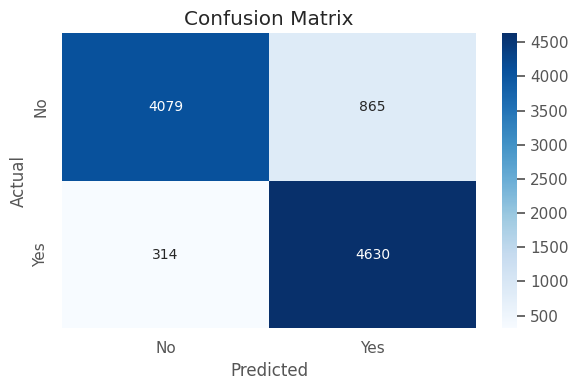

In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize XGBoost classifier with tuned hyperparameters
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=341,
    learning_rate=np.float64(0.28323850914860726),
    max_depth=8,
    subsample=np.float64(0.5079831261101071),
    colsample_bytree=np.float64(0.7252496259847715),
    gamma=np.float64(0.06632480579933264),
    reg_lambda=np.float64(3.854165025399161),
    random_state=42
)

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict on test set
y_predXG = xgb_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test,y_predXG )
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_predXG ))

# Confusion matrix
cm = confusion_matrix(y_test, y_predXG )
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


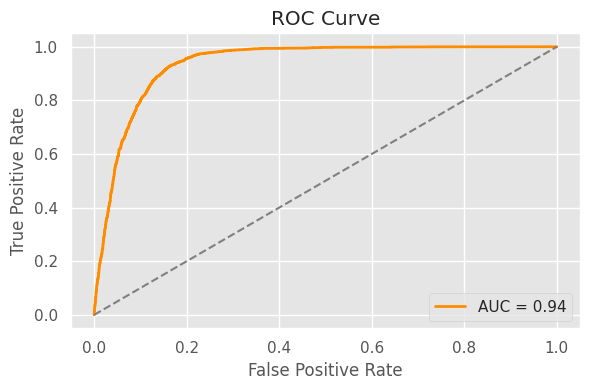

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for ROC curve
y_probs = xgb_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


## Random Forest Classifier

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      4944
           1       0.86      0.97      0.91      4944

    accuracy                           0.91      9888
   macro avg       0.92      0.91      0.91      9888
weighted avg       0.92      0.91      0.91      9888

[[4183  761]
 [ 138 4806]]


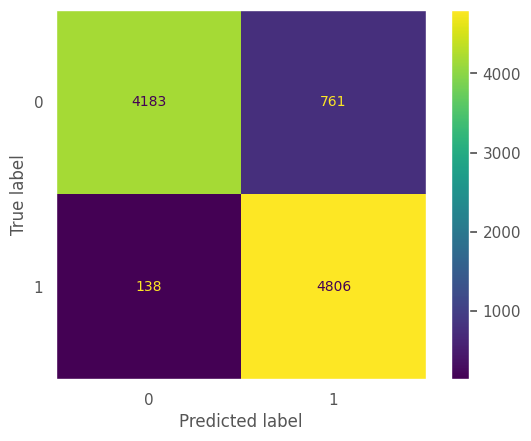

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


cm=confusion_matrix(y_test, y_pred_rf)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(visible=False)
plt.show()


AUC Score: 0.91


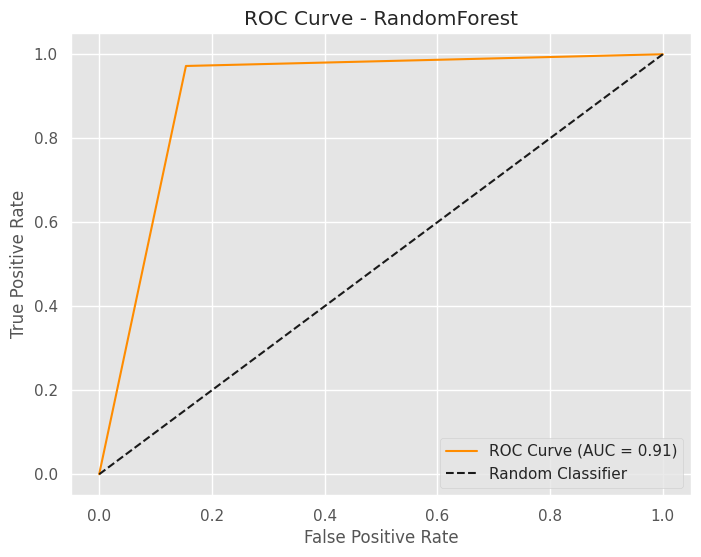

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
auc_score = roc_auc_score(y_test, y_pred_rf)
print(f"AUC Score: {auc_score:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForest')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve.png')
plt.show()


Doing GridSearch. Commented out because I saved it in a pickle.

In [ ]:
# import time
# import pickle
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize the Random Forest model for Grid Search
# rf_classifier_grid = RandomForestClassifier(random_state=42)

# # Train with GridSearchCV and time it
# start_time = time.time()
# grid_search3 = GridSearchCV(estimator=rf_classifier_grid, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
# grid_search3.fit(X_train, y_train)
# end_time = time.time()

# # Save the GridSearchCV object with pickle
# with open('rf_grid_search_model.pkl', 'wb') as f:
#     pickle.dump(grid_search3, f)

# # Print performance
# print(f"GridSearchCV took {end_time - start_time:.2f} seconds.")
# print("Best Hyperparameters:", grid_search3.best_params_)
# print("Best Accuracy:", grid_search3.best_score_)

In [ ]:
# best_RF = grid_search3.best_estimator_
# y_pred_best = best_RF.predict(X_test)
# print("Test Accuracy (Best Estimator):", accuracy_score(y_test, y_pred_best))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

In [ ]:
# # Load the GridSearchCV object
# with open('rf_grid_search_model.pkl', 'rb') as f:
#     grid_search3 = pickle.load(f)

# # Get the best estimator
# best_RF = grid_search3.best_estimator_

# # Make predictions
# y_pred_best = best_RF.predict(X_test)

# # Evaluate
# print("Test Accuracy (Best Estimator):", accuracy_score(y_test, y_pred_best))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# # Get predicted probabilities for the positive class (usually class 1)
# y_proba = best_RF.predict_proba(X_test)[:, 1]

# # Compute ROC curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# auc_score = roc_auc_score(y_test, y_proba)
# print(f"AUC Score: {auc_score:.2f}")

# # Plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
# plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - RandomForest')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.savefig('roc_curve.png')
# plt.show()


In [ ]:
# best_RF = grid_search3.best_estimator_
# y_pred_best = best_RF.predict(X_test)
# print("Test Accuracy (Best Estimator):", accuracy_score(y_test, y_pred_best))
# # Evaluate performance
# print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_best))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

## Naive Bayes

In [ ]:
import time
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


# Convert sparse matrices to dense arrays
X_train_dense = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# Initialize the Gaussian Naive Bayes model
nb_classifier = GaussianNB()

# Train the model and time it
start_time = time.time()
nb_classifier.fit(X_train_dense, y_train)
end_time = time.time()

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test_dense)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Training took {end_time - start_time:.2f} seconds.")
print(f"Accuracy: {accuracy_nb:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# Save the trained model to a pickle file
with open('nb_model.pkl', 'wb') as f:
    pickle.dump(nb_classifier, f)

print("Model saved to 'nb_model.pkl'")

Training took 0.09 seconds.
Accuracy: 0.69

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.45      0.59      4944
           1       0.63      0.94      0.75      4944

    accuracy                           0.69      9888
   macro avg       0.75      0.69      0.67      9888
weighted avg       0.75      0.69      0.67      9888


Confusion Matrix:
 [[2210 2734]
 [ 308 4636]]
Model saved to 'nb_model.pkl'


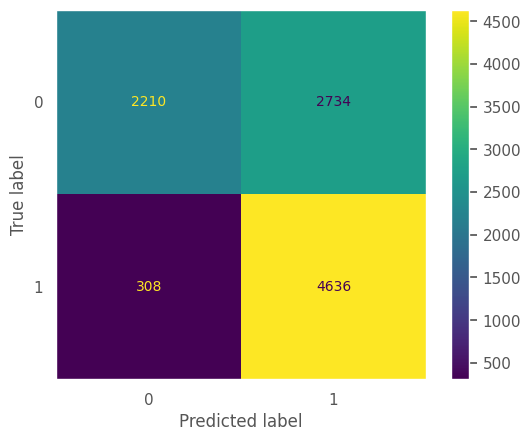

In [ ]:
cm =confusion_matrix(y_test, y_pred_nb)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(visible=False)
plt.show()

AUC Score: 0.69


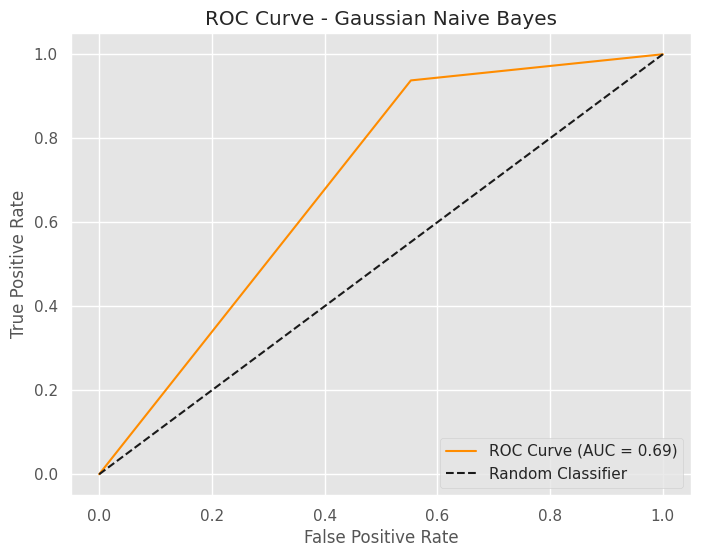

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, roc_auc_score
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
auc_score = roc_auc_score(y_test, y_pred_nb)
print(f"AUC Score: {auc_score:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve.png')
plt.show()

Compare all Models.

In [ ]:
#Decsion tree
y_hat_dt = model_dt.predict(X_test)
#Nave Bayes
y_pred_nb = nb_classifier.predict(X_test_dense)
# Logistic regression
y_hat_lr = model_lr.predict(X_test)

# knn
y_pred = knn.predict(X_test)

# XGboost
y_predXG = xgb_clf.predict(X_test)
#RandomForest Classifier
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Define models and their predictions
# model_names = ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'KNN', 'XGBoost', 'Random Forest']
# y_preds = [y_hat_dt, y_pred_nb, y_hat_lr, y_predk, y_predXG, y_pred_rf ]

# # Create subplots
# plt.figure(figsize=(18, 10))
# for i, (name, y_pred) in enumerate(zip(model_names, y_preds)):
#     cm = confusion_matrix(y_test, y_pred)
#     plt.subplot(2, 3, i + 1)
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
#     plt.title(f'{name} Confusion Matrix')
#     plt.xlabel('Predicted Label')
#     plt.ylabel('True Label')

# plt.tight_layout()
# plt.show()


In [ ]:
# from sklearn.metrics import classification_report

# # Define models and their predictions again
# model_names = ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'KNN', 'XGBoost', 'Random Forest']
# y_preds = [y_hat_dt, y_pred_nb, y_hat_lr, y_predk, y_predXG, y_pred_rf ]

# # Print classification reports
# for name, y_pred in zip(model_names, y_preds):
#     print(f"--- {name} Classification Report ---")
#     print(classification_report(y_test, y_pred))
#     print("\n" + "="*60 + "\n")


# Doing Multiple ROC curve

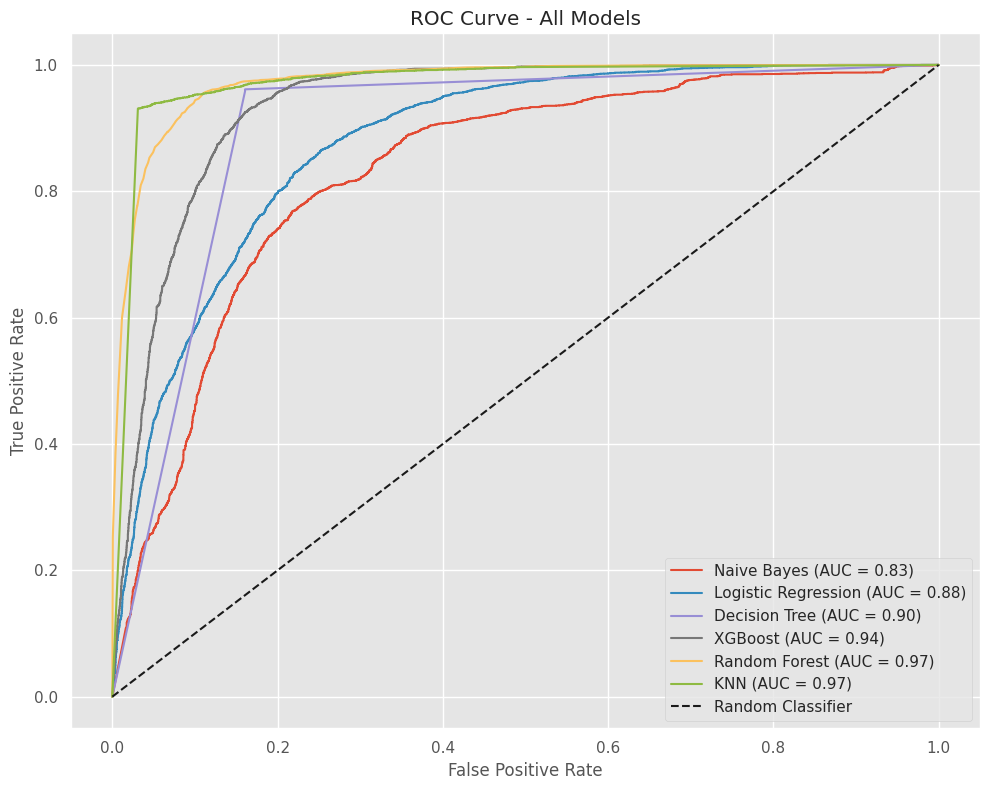

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
# Naive Bayes
y_prob_nb = nb_classifier.predict_proba(X_test_dense)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
auc_nb = roc_auc_score(y_test, y_prob_nb)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')

# Logistic Regression
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

# Decision Tree
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')


# XGBoost
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Random Forest
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')



# KNN
y_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')


# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

# Store metrics in a list of dictionaries
results = []

# Helper function to collect metrics
def collect_metrics(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Recall': recall_score(y_true, y_pred, average='macro'),
    }

# Decision Tree
results.append(collect_metrics('Decision Tree', y_test, y_hat_dt))

# Naive Bayes
results.append(collect_metrics('Naive Bayes', y_test, y_pred_nb))

# Logistic Regression
results.append(collect_metrics('Logistic Regression', y_test, y_hat_lr))

# KNN
results.append(collect_metrics('KNN', y_test, y_pred))

# XGBoost
results.append(collect_metrics('XGBoost', y_test, y_predXG))

# Random Forest
results.append(collect_metrics('Random Forest', y_test, y_pred_rf))

# Create DataFrame
results_df = pd.DataFrame(results)

# Round values for clean display
results_df[['Accuracy', 'Precision', 'Recall']] = results_df[['Accuracy', 'Precision', 'Recall']].round(4)

# Display
print(results_df)


                 Model  Accuracy  Precision  Recall
0        Decision Tree    0.9004     0.9064  0.9004
1          Naive Bayes    0.6924     0.7534  0.6924
2  Logistic Regression    0.8050     0.8084  0.8050
3                  KNN    0.8747     0.8922  0.8747
4              XGBoost    0.8808     0.8856  0.8808
5        Random Forest    0.9091     0.9157  0.9091


# Feature Importance on Random Forest

In [ ]:
import pandas as pd

# Example: Convert X_train (array or sparse matrix) back to DataFrame
# Ensure you have the correct feature names
feature_names = preprocessor.get_feature_names_out()  # or whatever gives you the names

X_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)


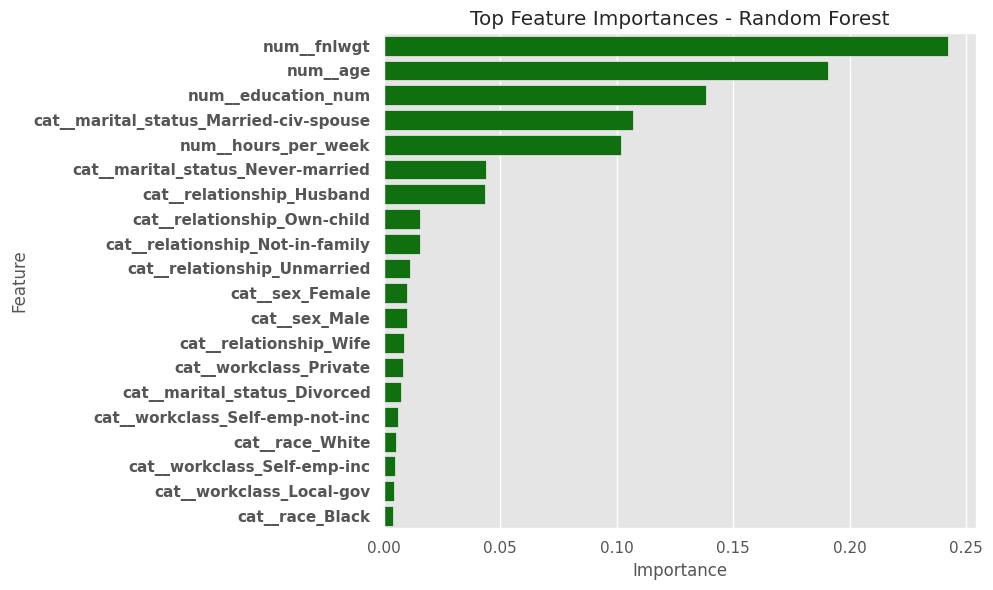

In [ ]:
importances = rf_classifier.feature_importances_

# Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), color='green')
plt.title('Top Feature Importances - Random Forest')

# Make y-axis labels bold
plt.yticks(fontweight='bold')

plt.tight_layout()
plt.show()


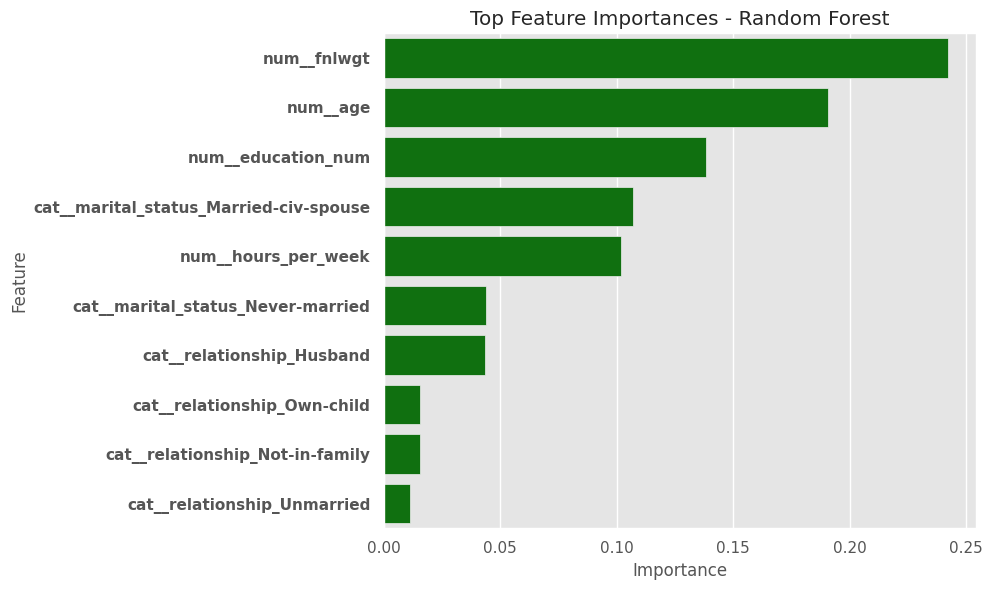

In [ ]:
importances = rf_classifier.feature_importances_

# Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), color='green')
plt.title('Top Feature Importances - Random Forest')

# Make y-axis labels bold
plt.yticks(fontweight='bold')

plt.tight_layout()
plt.show()
